In [4]:
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
import random

In [2]:
train_directory = '../data/Brats17TrainingData/'
valid_directory = '../data/Brats17ValidationData/'
test_directory = '../data/Brats17TestingData/'

In [16]:
def process_data(directory, postfix, saving_directory, interval = (0, 1)):
    file_names = os.listdir(directory)
    random.seed(5)
    random.shuffle(file_names)
    file_names = file_names[int(len(file_names) * interval[0]): int(len(file_names) * interval[1])]
    iterator = 0
    for name in file_names:
#       read images
        image = sitk.ReadImage(os.path.join(directory , name, name + postfix), sitk.sitkFloat32)
        image_seg = sitk.ReadImage(os.path.join(directory , name, name +'_seg.nii.gz'))
        vol = sitk.GetArrayFromImage(image)
        vol_seg = sitk.GetArrayFromImage(image_seg)
        image_max = vol.max()
#       get slices with labels from image
        slices = slice_images(vol, vol_seg, 50, 130, 1)
#       save image
        for idx, (image, label) in enumerate(slices):
            iterator += 1
            image_name = name + '_' +str(idx) + '.png'
            image *= 255 / image_max
            image = image.astype('uint16')
            save_image(image, os.path.join(saving_directory, str(label), image_name))
            print(os.path.join(saving_directory, str(label), image_name))
        print(iterator, ' generated images')
        
def slice_images(image_vol, image_seg_vol, from_z, to_z, step):
    return [(image_vol[z], get_label(image_seg_vol[z])) for z in range(from_z, to_z, step)]
        
        
def get_label(vol):
    return 1 if any(vol.flatten() > 0) else 0

def save_image(image, filename):
    
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory) 
    
    img = sitk.GetImageFromArray(image, isVector=False)
    sitk.WriteImage(img, filename, True)

### Dividing MRI images to two sets train and validation. Preprocessing this sets to slices

1. Divide images to train and validation
2. Read image
3. Normalize images intensities to 0-255
4. Slice 3D MRI image to 2D images
5. Save images as png

In [17]:
process_data(train_directory + 'HGG', '_t2.nii.gz', '../data/train/t2', (0, 0.8))

../data/train/t2/1/Brats17_CBICA_AVG_1_0.png
../data/train/t2/1/Brats17_CBICA_AVG_1_1.png
../data/train/t2/1/Brats17_CBICA_AVG_1_2.png
../data/train/t2/1/Brats17_CBICA_AVG_1_3.png
../data/train/t2/1/Brats17_CBICA_AVG_1_4.png
../data/train/t2/1/Brats17_CBICA_AVG_1_5.png
../data/train/t2/1/Brats17_CBICA_AVG_1_6.png
../data/train/t2/1/Brats17_CBICA_AVG_1_7.png
../data/train/t2/1/Brats17_CBICA_AVG_1_8.png
../data/train/t2/1/Brats17_CBICA_AVG_1_9.png
../data/train/t2/1/Brats17_CBICA_AVG_1_10.png
../data/train/t2/1/Brats17_CBICA_AVG_1_11.png
../data/train/t2/1/Brats17_CBICA_AVG_1_12.png
../data/train/t2/1/Brats17_CBICA_AVG_1_13.png
../data/train/t2/1/Brats17_CBICA_AVG_1_14.png
../data/train/t2/1/Brats17_CBICA_AVG_1_15.png
../data/train/t2/1/Brats17_CBICA_AVG_1_16.png
../data/train/t2/1/Brats17_CBICA_AVG_1_17.png
../data/train/t2/1/Brats17_CBICA_AVG_1_18.png
../data/train/t2/1/Brats17_CBICA_AVG_1_19.png
../data/train/t2/1/Brats17_CBICA_AVG_1_20.png
../data/train/t2/1/Brats17_CBICA_AVG_1_21.pn

../data/train/t2/1/Brats17_TCIA_448_1_0.png
../data/train/t2/1/Brats17_TCIA_448_1_1.png
../data/train/t2/1/Brats17_TCIA_448_1_2.png
../data/train/t2/1/Brats17_TCIA_448_1_3.png
../data/train/t2/1/Brats17_TCIA_448_1_4.png
../data/train/t2/1/Brats17_TCIA_448_1_5.png
../data/train/t2/1/Brats17_TCIA_448_1_6.png
../data/train/t2/1/Brats17_TCIA_448_1_7.png
../data/train/t2/1/Brats17_TCIA_448_1_8.png
../data/train/t2/1/Brats17_TCIA_448_1_9.png
../data/train/t2/1/Brats17_TCIA_448_1_10.png
../data/train/t2/1/Brats17_TCIA_448_1_11.png
../data/train/t2/1/Brats17_TCIA_448_1_12.png
../data/train/t2/1/Brats17_TCIA_448_1_13.png
../data/train/t2/1/Brats17_TCIA_448_1_14.png
../data/train/t2/1/Brats17_TCIA_448_1_15.png
../data/train/t2/1/Brats17_TCIA_448_1_16.png
../data/train/t2/1/Brats17_TCIA_448_1_17.png
../data/train/t2/1/Brats17_TCIA_448_1_18.png
../data/train/t2/1/Brats17_TCIA_448_1_19.png
../data/train/t2/1/Brats17_TCIA_448_1_20.png
../data/train/t2/1/Brats17_TCIA_448_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_CBICA_AAB_1_0.png
../data/train/t2/1/Brats17_CBICA_AAB_1_1.png
../data/train/t2/1/Brats17_CBICA_AAB_1_2.png
../data/train/t2/1/Brats17_CBICA_AAB_1_3.png
../data/train/t2/1/Brats17_CBICA_AAB_1_4.png
../data/train/t2/1/Brats17_CBICA_AAB_1_5.png
../data/train/t2/1/Brats17_CBICA_AAB_1_6.png
../data/train/t2/1/Brats17_CBICA_AAB_1_7.png
../data/train/t2/1/Brats17_CBICA_AAB_1_8.png
../data/train/t2/1/Brats17_CBICA_AAB_1_9.png
../data/train/t2/1/Brats17_CBICA_AAB_1_10.png
../data/train/t2/1/Brats17_CBICA_AAB_1_11.png
../data/train/t2/1/Brats17_CBICA_AAB_1_12.png
../data/train/t2/1/Brats17_CBICA_AAB_1_13.png
../data/train/t2/1/Brats17_CBICA_AAB_1_14.png
../data/train/t2/1/Brats17_CBICA_AAB_1_15.png
../data/train/t2/1/Brats17_CBICA_AAB_1_16.png
../data/train/t2/1/Brats17_CBICA_AAB_1_17.png
../data/train/t2/1/Brats17_CBICA_AAB_1_18.png
../data/train/t2/1/Brats17_CBICA_AAB_1_19.png
../data/train/t2/1/Brats17_CBICA_AAB_1_20.png
../data/train/t2/1/Brats17_CBICA_AAB_1_21.pn

../data/train/t2/0/Brats17_CBICA_AAP_1_0.png
../data/train/t2/0/Brats17_CBICA_AAP_1_1.png
../data/train/t2/0/Brats17_CBICA_AAP_1_2.png
../data/train/t2/0/Brats17_CBICA_AAP_1_3.png
../data/train/t2/1/Brats17_CBICA_AAP_1_4.png
../data/train/t2/1/Brats17_CBICA_AAP_1_5.png
../data/train/t2/1/Brats17_CBICA_AAP_1_6.png
../data/train/t2/1/Brats17_CBICA_AAP_1_7.png
../data/train/t2/1/Brats17_CBICA_AAP_1_8.png
../data/train/t2/1/Brats17_CBICA_AAP_1_9.png
../data/train/t2/1/Brats17_CBICA_AAP_1_10.png
../data/train/t2/1/Brats17_CBICA_AAP_1_11.png
../data/train/t2/1/Brats17_CBICA_AAP_1_12.png
../data/train/t2/1/Brats17_CBICA_AAP_1_13.png
../data/train/t2/1/Brats17_CBICA_AAP_1_14.png
../data/train/t2/1/Brats17_CBICA_AAP_1_15.png
../data/train/t2/1/Brats17_CBICA_AAP_1_16.png
../data/train/t2/1/Brats17_CBICA_AAP_1_17.png
../data/train/t2/1/Brats17_CBICA_AAP_1_18.png
../data/train/t2/1/Brats17_CBICA_AAP_1_19.png
../data/train/t2/1/Brats17_CBICA_AAP_1_20.png
../data/train/t2/1/Brats17_CBICA_AAP_1_21.pn

../data/train/t2/1/Brats17_TCIA_205_1_0.png
../data/train/t2/1/Brats17_TCIA_205_1_1.png
../data/train/t2/1/Brats17_TCIA_205_1_2.png
../data/train/t2/1/Brats17_TCIA_205_1_3.png
../data/train/t2/1/Brats17_TCIA_205_1_4.png
../data/train/t2/1/Brats17_TCIA_205_1_5.png
../data/train/t2/1/Brats17_TCIA_205_1_6.png
../data/train/t2/1/Brats17_TCIA_205_1_7.png
../data/train/t2/1/Brats17_TCIA_205_1_8.png
../data/train/t2/1/Brats17_TCIA_205_1_9.png
../data/train/t2/1/Brats17_TCIA_205_1_10.png
../data/train/t2/1/Brats17_TCIA_205_1_11.png
../data/train/t2/1/Brats17_TCIA_205_1_12.png
../data/train/t2/1/Brats17_TCIA_205_1_13.png
../data/train/t2/1/Brats17_TCIA_205_1_14.png
../data/train/t2/1/Brats17_TCIA_205_1_15.png
../data/train/t2/1/Brats17_TCIA_205_1_16.png
../data/train/t2/1/Brats17_TCIA_205_1_17.png
../data/train/t2/1/Brats17_TCIA_205_1_18.png
../data/train/t2/1/Brats17_TCIA_205_1_19.png
../data/train/t2/1/Brats17_TCIA_205_1_20.png
../data/train/t2/1/Brats17_TCIA_205_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_TCIA_607_1_0.png
../data/train/t2/1/Brats17_TCIA_607_1_1.png
../data/train/t2/1/Brats17_TCIA_607_1_2.png
../data/train/t2/1/Brats17_TCIA_607_1_3.png
../data/train/t2/1/Brats17_TCIA_607_1_4.png
../data/train/t2/1/Brats17_TCIA_607_1_5.png
../data/train/t2/1/Brats17_TCIA_607_1_6.png
../data/train/t2/1/Brats17_TCIA_607_1_7.png
../data/train/t2/1/Brats17_TCIA_607_1_8.png
../data/train/t2/1/Brats17_TCIA_607_1_9.png
../data/train/t2/1/Brats17_TCIA_607_1_10.png
../data/train/t2/1/Brats17_TCIA_607_1_11.png
../data/train/t2/1/Brats17_TCIA_607_1_12.png
../data/train/t2/1/Brats17_TCIA_607_1_13.png
../data/train/t2/1/Brats17_TCIA_607_1_14.png
../data/train/t2/1/Brats17_TCIA_607_1_15.png
../data/train/t2/1/Brats17_TCIA_607_1_16.png
../data/train/t2/1/Brats17_TCIA_607_1_17.png
../data/train/t2/1/Brats17_TCIA_607_1_18.png
../data/train/t2/1/Brats17_TCIA_607_1_19.png
../data/train/t2/1/Brats17_TCIA_607_1_20.png
../data/train/t2/1/Brats17_TCIA_607_1_21.png
../data/train/t2/1/B

../data/train/t2/0/Brats17_CBICA_AYI_1_0.png
../data/train/t2/0/Brats17_CBICA_AYI_1_1.png
../data/train/t2/0/Brats17_CBICA_AYI_1_2.png
../data/train/t2/0/Brats17_CBICA_AYI_1_3.png
../data/train/t2/0/Brats17_CBICA_AYI_1_4.png
../data/train/t2/0/Brats17_CBICA_AYI_1_5.png
../data/train/t2/0/Brats17_CBICA_AYI_1_6.png
../data/train/t2/0/Brats17_CBICA_AYI_1_7.png
../data/train/t2/0/Brats17_CBICA_AYI_1_8.png
../data/train/t2/0/Brats17_CBICA_AYI_1_9.png
../data/train/t2/0/Brats17_CBICA_AYI_1_10.png
../data/train/t2/0/Brats17_CBICA_AYI_1_11.png
../data/train/t2/0/Brats17_CBICA_AYI_1_12.png
../data/train/t2/0/Brats17_CBICA_AYI_1_13.png
../data/train/t2/0/Brats17_CBICA_AYI_1_14.png
../data/train/t2/0/Brats17_CBICA_AYI_1_15.png
../data/train/t2/0/Brats17_CBICA_AYI_1_16.png
../data/train/t2/0/Brats17_CBICA_AYI_1_17.png
../data/train/t2/0/Brats17_CBICA_AYI_1_18.png
../data/train/t2/0/Brats17_CBICA_AYI_1_19.png
../data/train/t2/0/Brats17_CBICA_AYI_1_20.png
../data/train/t2/0/Brats17_CBICA_AYI_1_21.pn

../data/train/t2/0/Brats17_CBICA_APY_1_72.png
../data/train/t2/0/Brats17_CBICA_APY_1_73.png
../data/train/t2/0/Brats17_CBICA_APY_1_74.png
../data/train/t2/0/Brats17_CBICA_APY_1_75.png
../data/train/t2/0/Brats17_CBICA_APY_1_76.png
../data/train/t2/0/Brats17_CBICA_APY_1_77.png
../data/train/t2/0/Brats17_CBICA_APY_1_78.png
../data/train/t2/0/Brats17_CBICA_APY_1_79.png
1680  generated images
../data/train/t2/1/Brats17_CBICA_ASH_1_0.png
../data/train/t2/1/Brats17_CBICA_ASH_1_1.png
../data/train/t2/1/Brats17_CBICA_ASH_1_2.png
../data/train/t2/1/Brats17_CBICA_ASH_1_3.png
../data/train/t2/1/Brats17_CBICA_ASH_1_4.png
../data/train/t2/1/Brats17_CBICA_ASH_1_5.png
../data/train/t2/1/Brats17_CBICA_ASH_1_6.png
../data/train/t2/1/Brats17_CBICA_ASH_1_7.png
../data/train/t2/1/Brats17_CBICA_ASH_1_8.png
../data/train/t2/1/Brats17_CBICA_ASH_1_9.png
../data/train/t2/1/Brats17_CBICA_ASH_1_10.png
../data/train/t2/1/Brats17_CBICA_ASH_1_11.png
../data/train/t2/1/Brats17_CBICA_ASH_1_12.png
../data/train/t2/1/Br

../data/train/t2/1/Brats17_TCIA_396_1_10.png
../data/train/t2/1/Brats17_TCIA_396_1_11.png
../data/train/t2/1/Brats17_TCIA_396_1_12.png
../data/train/t2/1/Brats17_TCIA_396_1_13.png
../data/train/t2/1/Brats17_TCIA_396_1_14.png
../data/train/t2/1/Brats17_TCIA_396_1_15.png
../data/train/t2/1/Brats17_TCIA_396_1_16.png
../data/train/t2/1/Brats17_TCIA_396_1_17.png
../data/train/t2/1/Brats17_TCIA_396_1_18.png
../data/train/t2/1/Brats17_TCIA_396_1_19.png
../data/train/t2/1/Brats17_TCIA_396_1_20.png
../data/train/t2/1/Brats17_TCIA_396_1_21.png
../data/train/t2/1/Brats17_TCIA_396_1_22.png
../data/train/t2/1/Brats17_TCIA_396_1_23.png
../data/train/t2/1/Brats17_TCIA_396_1_24.png
../data/train/t2/1/Brats17_TCIA_396_1_25.png
../data/train/t2/1/Brats17_TCIA_396_1_26.png
../data/train/t2/1/Brats17_TCIA_396_1_27.png
../data/train/t2/1/Brats17_TCIA_396_1_28.png
../data/train/t2/1/Brats17_TCIA_396_1_29.png
../data/train/t2/1/Brats17_TCIA_396_1_30.png
../data/train/t2/1/Brats17_TCIA_396_1_31.png
../data/tr

../data/train/t2/0/Brats17_CBICA_AXJ_1_0.png
../data/train/t2/0/Brats17_CBICA_AXJ_1_1.png
../data/train/t2/0/Brats17_CBICA_AXJ_1_2.png
../data/train/t2/0/Brats17_CBICA_AXJ_1_3.png
../data/train/t2/0/Brats17_CBICA_AXJ_1_4.png
../data/train/t2/0/Brats17_CBICA_AXJ_1_5.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_6.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_7.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_8.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_9.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_10.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_11.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_12.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_13.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_14.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_15.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_16.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_17.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_18.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_19.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_20.png
../data/train/t2/1/Brats17_CBICA_AXJ_1_21.pn

../data/train/t2/0/Brats17_TCIA_425_1_71.png
../data/train/t2/0/Brats17_TCIA_425_1_72.png
../data/train/t2/0/Brats17_TCIA_425_1_73.png
../data/train/t2/0/Brats17_TCIA_425_1_74.png
../data/train/t2/0/Brats17_TCIA_425_1_75.png
../data/train/t2/0/Brats17_TCIA_425_1_76.png
../data/train/t2/0/Brats17_TCIA_425_1_77.png
../data/train/t2/0/Brats17_TCIA_425_1_78.png
../data/train/t2/0/Brats17_TCIA_425_1_79.png
2320  generated images
../data/train/t2/1/Brats17_CBICA_ASE_1_0.png
../data/train/t2/1/Brats17_CBICA_ASE_1_1.png
../data/train/t2/1/Brats17_CBICA_ASE_1_2.png
../data/train/t2/1/Brats17_CBICA_ASE_1_3.png
../data/train/t2/1/Brats17_CBICA_ASE_1_4.png
../data/train/t2/1/Brats17_CBICA_ASE_1_5.png
../data/train/t2/1/Brats17_CBICA_ASE_1_6.png
../data/train/t2/1/Brats17_CBICA_ASE_1_7.png
../data/train/t2/1/Brats17_CBICA_ASE_1_8.png
../data/train/t2/1/Brats17_CBICA_ASE_1_9.png
../data/train/t2/1/Brats17_CBICA_ASE_1_10.png
../data/train/t2/1/Brats17_CBICA_ASE_1_11.png
../data/train/t2/1/Brats17_CBI

../data/train/t2/0/Brats17_TCIA_430_1_0.png
../data/train/t2/0/Brats17_TCIA_430_1_1.png
../data/train/t2/0/Brats17_TCIA_430_1_2.png
../data/train/t2/0/Brats17_TCIA_430_1_3.png
../data/train/t2/0/Brats17_TCIA_430_1_4.png
../data/train/t2/0/Brats17_TCIA_430_1_5.png
../data/train/t2/0/Brats17_TCIA_430_1_6.png
../data/train/t2/0/Brats17_TCIA_430_1_7.png
../data/train/t2/0/Brats17_TCIA_430_1_8.png
../data/train/t2/0/Brats17_TCIA_430_1_9.png
../data/train/t2/0/Brats17_TCIA_430_1_10.png
../data/train/t2/0/Brats17_TCIA_430_1_11.png
../data/train/t2/0/Brats17_TCIA_430_1_12.png
../data/train/t2/0/Brats17_TCIA_430_1_13.png
../data/train/t2/0/Brats17_TCIA_430_1_14.png
../data/train/t2/0/Brats17_TCIA_430_1_15.png
../data/train/t2/0/Brats17_TCIA_430_1_16.png
../data/train/t2/1/Brats17_TCIA_430_1_17.png
../data/train/t2/1/Brats17_TCIA_430_1_18.png
../data/train/t2/1/Brats17_TCIA_430_1_19.png
../data/train/t2/1/Brats17_TCIA_430_1_20.png
../data/train/t2/1/Brats17_TCIA_430_1_21.png
../data/train/t2/1/B

../data/train/t2/0/Brats17_TCIA_374_1_78.png
../data/train/t2/0/Brats17_TCIA_374_1_79.png
2800  generated images
../data/train/t2/0/Brats17_CBICA_ASK_1_0.png
../data/train/t2/0/Brats17_CBICA_ASK_1_1.png
../data/train/t2/1/Brats17_CBICA_ASK_1_2.png
../data/train/t2/1/Brats17_CBICA_ASK_1_3.png
../data/train/t2/1/Brats17_CBICA_ASK_1_4.png
../data/train/t2/1/Brats17_CBICA_ASK_1_5.png
../data/train/t2/1/Brats17_CBICA_ASK_1_6.png
../data/train/t2/1/Brats17_CBICA_ASK_1_7.png
../data/train/t2/1/Brats17_CBICA_ASK_1_8.png
../data/train/t2/1/Brats17_CBICA_ASK_1_9.png
../data/train/t2/1/Brats17_CBICA_ASK_1_10.png
../data/train/t2/1/Brats17_CBICA_ASK_1_11.png
../data/train/t2/1/Brats17_CBICA_ASK_1_12.png
../data/train/t2/1/Brats17_CBICA_ASK_1_13.png
../data/train/t2/1/Brats17_CBICA_ASK_1_14.png
../data/train/t2/1/Brats17_CBICA_ASK_1_15.png
../data/train/t2/1/Brats17_CBICA_ASK_1_16.png
../data/train/t2/1/Brats17_CBICA_ASK_1_17.png
../data/train/t2/1/Brats17_CBICA_ASK_1_18.png
../data/train/t2/1/Brat

../data/train/t2/1/Brats17_2013_11_1_0.png
../data/train/t2/1/Brats17_2013_11_1_1.png
../data/train/t2/1/Brats17_2013_11_1_2.png
../data/train/t2/1/Brats17_2013_11_1_3.png
../data/train/t2/1/Brats17_2013_11_1_4.png
../data/train/t2/1/Brats17_2013_11_1_5.png
../data/train/t2/1/Brats17_2013_11_1_6.png
../data/train/t2/1/Brats17_2013_11_1_7.png
../data/train/t2/1/Brats17_2013_11_1_8.png
../data/train/t2/1/Brats17_2013_11_1_9.png
../data/train/t2/1/Brats17_2013_11_1_10.png
../data/train/t2/1/Brats17_2013_11_1_11.png
../data/train/t2/1/Brats17_2013_11_1_12.png
../data/train/t2/1/Brats17_2013_11_1_13.png
../data/train/t2/1/Brats17_2013_11_1_14.png
../data/train/t2/1/Brats17_2013_11_1_15.png
../data/train/t2/1/Brats17_2013_11_1_16.png
../data/train/t2/1/Brats17_2013_11_1_17.png
../data/train/t2/1/Brats17_2013_11_1_18.png
../data/train/t2/1/Brats17_2013_11_1_19.png
../data/train/t2/1/Brats17_2013_11_1_20.png
../data/train/t2/1/Brats17_2013_11_1_21.png
../data/train/t2/1/Brats17_2013_11_1_22.pn

../data/train/t2/1/Brats17_TCIA_300_1_0.png
../data/train/t2/1/Brats17_TCIA_300_1_1.png
../data/train/t2/1/Brats17_TCIA_300_1_2.png
../data/train/t2/1/Brats17_TCIA_300_1_3.png
../data/train/t2/1/Brats17_TCIA_300_1_4.png
../data/train/t2/1/Brats17_TCIA_300_1_5.png
../data/train/t2/1/Brats17_TCIA_300_1_6.png
../data/train/t2/1/Brats17_TCIA_300_1_7.png
../data/train/t2/1/Brats17_TCIA_300_1_8.png
../data/train/t2/1/Brats17_TCIA_300_1_9.png
../data/train/t2/1/Brats17_TCIA_300_1_10.png
../data/train/t2/1/Brats17_TCIA_300_1_11.png
../data/train/t2/1/Brats17_TCIA_300_1_12.png
../data/train/t2/1/Brats17_TCIA_300_1_13.png
../data/train/t2/1/Brats17_TCIA_300_1_14.png
../data/train/t2/1/Brats17_TCIA_300_1_15.png
../data/train/t2/1/Brats17_TCIA_300_1_16.png
../data/train/t2/1/Brats17_TCIA_300_1_17.png
../data/train/t2/1/Brats17_TCIA_300_1_18.png
../data/train/t2/1/Brats17_TCIA_300_1_19.png
../data/train/t2/1/Brats17_TCIA_300_1_20.png
../data/train/t2/1/Brats17_TCIA_300_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_TCIA_321_1_0.png
../data/train/t2/1/Brats17_TCIA_321_1_1.png
../data/train/t2/1/Brats17_TCIA_321_1_2.png
../data/train/t2/1/Brats17_TCIA_321_1_3.png
../data/train/t2/1/Brats17_TCIA_321_1_4.png
../data/train/t2/1/Brats17_TCIA_321_1_5.png
../data/train/t2/1/Brats17_TCIA_321_1_6.png
../data/train/t2/1/Brats17_TCIA_321_1_7.png
../data/train/t2/1/Brats17_TCIA_321_1_8.png
../data/train/t2/1/Brats17_TCIA_321_1_9.png
../data/train/t2/1/Brats17_TCIA_321_1_10.png
../data/train/t2/1/Brats17_TCIA_321_1_11.png
../data/train/t2/1/Brats17_TCIA_321_1_12.png
../data/train/t2/1/Brats17_TCIA_321_1_13.png
../data/train/t2/1/Brats17_TCIA_321_1_14.png
../data/train/t2/1/Brats17_TCIA_321_1_15.png
../data/train/t2/1/Brats17_TCIA_321_1_16.png
../data/train/t2/1/Brats17_TCIA_321_1_17.png
../data/train/t2/1/Brats17_TCIA_321_1_18.png
../data/train/t2/1/Brats17_TCIA_321_1_19.png
../data/train/t2/1/Brats17_TCIA_321_1_20.png
../data/train/t2/1/Brats17_TCIA_321_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_TCIA_331_1_0.png
../data/train/t2/1/Brats17_TCIA_331_1_1.png
../data/train/t2/1/Brats17_TCIA_331_1_2.png
../data/train/t2/1/Brats17_TCIA_331_1_3.png
../data/train/t2/1/Brats17_TCIA_331_1_4.png
../data/train/t2/1/Brats17_TCIA_331_1_5.png
../data/train/t2/1/Brats17_TCIA_331_1_6.png
../data/train/t2/1/Brats17_TCIA_331_1_7.png
../data/train/t2/1/Brats17_TCIA_331_1_8.png
../data/train/t2/1/Brats17_TCIA_331_1_9.png
../data/train/t2/1/Brats17_TCIA_331_1_10.png
../data/train/t2/1/Brats17_TCIA_331_1_11.png
../data/train/t2/1/Brats17_TCIA_331_1_12.png
../data/train/t2/1/Brats17_TCIA_331_1_13.png
../data/train/t2/1/Brats17_TCIA_331_1_14.png
../data/train/t2/1/Brats17_TCIA_331_1_15.png
../data/train/t2/1/Brats17_TCIA_331_1_16.png
../data/train/t2/1/Brats17_TCIA_331_1_17.png
../data/train/t2/1/Brats17_TCIA_331_1_18.png
../data/train/t2/1/Brats17_TCIA_331_1_19.png
../data/train/t2/1/Brats17_TCIA_331_1_20.png
../data/train/t2/1/Brats17_TCIA_331_1_21.png
../data/train/t2/1/B

../data/train/t2/0/Brats17_2013_5_1_0.png
../data/train/t2/0/Brats17_2013_5_1_1.png
../data/train/t2/0/Brats17_2013_5_1_2.png
../data/train/t2/0/Brats17_2013_5_1_3.png
../data/train/t2/0/Brats17_2013_5_1_4.png
../data/train/t2/0/Brats17_2013_5_1_5.png
../data/train/t2/0/Brats17_2013_5_1_6.png
../data/train/t2/0/Brats17_2013_5_1_7.png
../data/train/t2/0/Brats17_2013_5_1_8.png
../data/train/t2/0/Brats17_2013_5_1_9.png
../data/train/t2/0/Brats17_2013_5_1_10.png
../data/train/t2/0/Brats17_2013_5_1_11.png
../data/train/t2/0/Brats17_2013_5_1_12.png
../data/train/t2/0/Brats17_2013_5_1_13.png
../data/train/t2/0/Brats17_2013_5_1_14.png
../data/train/t2/0/Brats17_2013_5_1_15.png
../data/train/t2/0/Brats17_2013_5_1_16.png
../data/train/t2/1/Brats17_2013_5_1_17.png
../data/train/t2/1/Brats17_2013_5_1_18.png
../data/train/t2/1/Brats17_2013_5_1_19.png
../data/train/t2/1/Brats17_2013_5_1_20.png
../data/train/t2/1/Brats17_2013_5_1_21.png
../data/train/t2/1/Brats17_2013_5_1_22.png
../data/train/t2/1/Br

../data/train/t2/1/Brats17_CBICA_AVJ_1_0.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_1.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_2.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_3.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_4.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_5.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_6.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_7.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_8.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_9.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_10.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_11.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_12.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_13.png
../data/train/t2/0/Brats17_CBICA_AVJ_1_14.png
../data/train/t2/0/Brats17_CBICA_AVJ_1_15.png
../data/train/t2/0/Brats17_CBICA_AVJ_1_16.png
../data/train/t2/0/Brats17_CBICA_AVJ_1_17.png
../data/train/t2/0/Brats17_CBICA_AVJ_1_18.png
../data/train/t2/0/Brats17_CBICA_AVJ_1_19.png
../data/train/t2/0/Brats17_CBICA_AVJ_1_20.png
../data/train/t2/1/Brats17_CBICA_AVJ_1_21.pn

../data/train/t2/1/Brats17_CBICA_AQU_1_0.png
../data/train/t2/1/Brats17_CBICA_AQU_1_1.png
../data/train/t2/1/Brats17_CBICA_AQU_1_2.png
../data/train/t2/1/Brats17_CBICA_AQU_1_3.png
../data/train/t2/1/Brats17_CBICA_AQU_1_4.png
../data/train/t2/1/Brats17_CBICA_AQU_1_5.png
../data/train/t2/1/Brats17_CBICA_AQU_1_6.png
../data/train/t2/1/Brats17_CBICA_AQU_1_7.png
../data/train/t2/1/Brats17_CBICA_AQU_1_8.png
../data/train/t2/1/Brats17_CBICA_AQU_1_9.png
../data/train/t2/1/Brats17_CBICA_AQU_1_10.png
../data/train/t2/1/Brats17_CBICA_AQU_1_11.png
../data/train/t2/1/Brats17_CBICA_AQU_1_12.png
../data/train/t2/1/Brats17_CBICA_AQU_1_13.png
../data/train/t2/1/Brats17_CBICA_AQU_1_14.png
../data/train/t2/1/Brats17_CBICA_AQU_1_15.png
../data/train/t2/1/Brats17_CBICA_AQU_1_16.png
../data/train/t2/1/Brats17_CBICA_AQU_1_17.png
../data/train/t2/1/Brats17_CBICA_AQU_1_18.png
../data/train/t2/1/Brats17_CBICA_AQU_1_19.png
../data/train/t2/1/Brats17_CBICA_AQU_1_20.png
../data/train/t2/1/Brats17_CBICA_AQU_1_21.pn

../data/train/t2/0/Brats17_TCIA_208_1_0.png
../data/train/t2/0/Brats17_TCIA_208_1_1.png
../data/train/t2/0/Brats17_TCIA_208_1_2.png
../data/train/t2/0/Brats17_TCIA_208_1_3.png
../data/train/t2/0/Brats17_TCIA_208_1_4.png
../data/train/t2/0/Brats17_TCIA_208_1_5.png
../data/train/t2/0/Brats17_TCIA_208_1_6.png
../data/train/t2/0/Brats17_TCIA_208_1_7.png
../data/train/t2/0/Brats17_TCIA_208_1_8.png
../data/train/t2/0/Brats17_TCIA_208_1_9.png
../data/train/t2/0/Brats17_TCIA_208_1_10.png
../data/train/t2/1/Brats17_TCIA_208_1_11.png
../data/train/t2/1/Brats17_TCIA_208_1_12.png
../data/train/t2/1/Brats17_TCIA_208_1_13.png
../data/train/t2/1/Brats17_TCIA_208_1_14.png
../data/train/t2/1/Brats17_TCIA_208_1_15.png
../data/train/t2/1/Brats17_TCIA_208_1_16.png
../data/train/t2/1/Brats17_TCIA_208_1_17.png
../data/train/t2/1/Brats17_TCIA_208_1_18.png
../data/train/t2/1/Brats17_TCIA_208_1_19.png
../data/train/t2/1/Brats17_TCIA_208_1_20.png
../data/train/t2/1/Brats17_TCIA_208_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_CBICA_AOZ_1_0.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_1.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_2.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_3.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_4.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_5.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_6.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_7.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_8.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_9.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_10.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_11.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_12.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_13.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_14.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_15.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_16.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_17.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_18.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_19.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_20.png
../data/train/t2/1/Brats17_CBICA_AOZ_1_21.pn

../data/train/t2/0/Brats17_TCIA_361_1_0.png
../data/train/t2/0/Brats17_TCIA_361_1_1.png
../data/train/t2/0/Brats17_TCIA_361_1_2.png
../data/train/t2/0/Brats17_TCIA_361_1_3.png
../data/train/t2/1/Brats17_TCIA_361_1_4.png
../data/train/t2/1/Brats17_TCIA_361_1_5.png
../data/train/t2/1/Brats17_TCIA_361_1_6.png
../data/train/t2/1/Brats17_TCIA_361_1_7.png
../data/train/t2/1/Brats17_TCIA_361_1_8.png
../data/train/t2/1/Brats17_TCIA_361_1_9.png
../data/train/t2/1/Brats17_TCIA_361_1_10.png
../data/train/t2/1/Brats17_TCIA_361_1_11.png
../data/train/t2/1/Brats17_TCIA_361_1_12.png
../data/train/t2/1/Brats17_TCIA_361_1_13.png
../data/train/t2/1/Brats17_TCIA_361_1_14.png
../data/train/t2/1/Brats17_TCIA_361_1_15.png
../data/train/t2/1/Brats17_TCIA_361_1_16.png
../data/train/t2/1/Brats17_TCIA_361_1_17.png
../data/train/t2/1/Brats17_TCIA_361_1_18.png
../data/train/t2/1/Brats17_TCIA_361_1_19.png
../data/train/t2/1/Brats17_TCIA_361_1_20.png
../data/train/t2/1/Brats17_TCIA_361_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_TCIA_242_1_79.png
5440  generated images
../data/train/t2/1/Brats17_CBICA_AXO_1_0.png
../data/train/t2/1/Brats17_CBICA_AXO_1_1.png
../data/train/t2/1/Brats17_CBICA_AXO_1_2.png
../data/train/t2/1/Brats17_CBICA_AXO_1_3.png
../data/train/t2/1/Brats17_CBICA_AXO_1_4.png
../data/train/t2/1/Brats17_CBICA_AXO_1_5.png
../data/train/t2/1/Brats17_CBICA_AXO_1_6.png
../data/train/t2/1/Brats17_CBICA_AXO_1_7.png
../data/train/t2/1/Brats17_CBICA_AXO_1_8.png
../data/train/t2/1/Brats17_CBICA_AXO_1_9.png
../data/train/t2/1/Brats17_CBICA_AXO_1_10.png
../data/train/t2/1/Brats17_CBICA_AXO_1_11.png
../data/train/t2/1/Brats17_CBICA_AXO_1_12.png
../data/train/t2/1/Brats17_CBICA_AXO_1_13.png
../data/train/t2/1/Brats17_CBICA_AXO_1_14.png
../data/train/t2/1/Brats17_CBICA_AXO_1_15.png
../data/train/t2/1/Brats17_CBICA_AXO_1_16.png
../data/train/t2/1/Brats17_CBICA_AXO_1_17.png
../data/train/t2/1/Brats17_CBICA_AXO_1_18.png
../data/train/t2/1/Brats17_CBICA_AXO_1_19.png
../data/train/t2/1/Bra

../data/train/t2/1/Brats17_TCIA_171_1_0.png
../data/train/t2/1/Brats17_TCIA_171_1_1.png
../data/train/t2/1/Brats17_TCIA_171_1_2.png
../data/train/t2/1/Brats17_TCIA_171_1_3.png
../data/train/t2/1/Brats17_TCIA_171_1_4.png
../data/train/t2/1/Brats17_TCIA_171_1_5.png
../data/train/t2/1/Brats17_TCIA_171_1_6.png
../data/train/t2/1/Brats17_TCIA_171_1_7.png
../data/train/t2/1/Brats17_TCIA_171_1_8.png
../data/train/t2/1/Brats17_TCIA_171_1_9.png
../data/train/t2/1/Brats17_TCIA_171_1_10.png
../data/train/t2/1/Brats17_TCIA_171_1_11.png
../data/train/t2/1/Brats17_TCIA_171_1_12.png
../data/train/t2/1/Brats17_TCIA_171_1_13.png
../data/train/t2/1/Brats17_TCIA_171_1_14.png
../data/train/t2/1/Brats17_TCIA_171_1_15.png
../data/train/t2/1/Brats17_TCIA_171_1_16.png
../data/train/t2/1/Brats17_TCIA_171_1_17.png
../data/train/t2/1/Brats17_TCIA_171_1_18.png
../data/train/t2/1/Brats17_TCIA_171_1_19.png
../data/train/t2/1/Brats17_TCIA_171_1_20.png
../data/train/t2/1/Brats17_TCIA_171_1_21.png
../data/train/t2/1/B

../data/train/t2/0/Brats17_CBICA_ALX_1_0.png
../data/train/t2/0/Brats17_CBICA_ALX_1_1.png
../data/train/t2/0/Brats17_CBICA_ALX_1_2.png
../data/train/t2/0/Brats17_CBICA_ALX_1_3.png
../data/train/t2/0/Brats17_CBICA_ALX_1_4.png
../data/train/t2/1/Brats17_CBICA_ALX_1_5.png
../data/train/t2/1/Brats17_CBICA_ALX_1_6.png
../data/train/t2/1/Brats17_CBICA_ALX_1_7.png
../data/train/t2/1/Brats17_CBICA_ALX_1_8.png
../data/train/t2/1/Brats17_CBICA_ALX_1_9.png
../data/train/t2/1/Brats17_CBICA_ALX_1_10.png
../data/train/t2/1/Brats17_CBICA_ALX_1_11.png
../data/train/t2/1/Brats17_CBICA_ALX_1_12.png
../data/train/t2/1/Brats17_CBICA_ALX_1_13.png
../data/train/t2/1/Brats17_CBICA_ALX_1_14.png
../data/train/t2/1/Brats17_CBICA_ALX_1_15.png
../data/train/t2/1/Brats17_CBICA_ALX_1_16.png
../data/train/t2/1/Brats17_CBICA_ALX_1_17.png
../data/train/t2/1/Brats17_CBICA_ALX_1_18.png
../data/train/t2/1/Brats17_CBICA_ALX_1_19.png
../data/train/t2/1/Brats17_CBICA_ALX_1_20.png
../data/train/t2/1/Brats17_CBICA_ALX_1_21.pn

../data/train/t2/1/Brats17_CBICA_AQZ_1_0.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_1.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_2.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_3.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_4.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_5.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_6.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_7.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_8.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_9.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_10.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_11.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_12.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_13.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_14.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_15.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_16.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_17.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_18.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_19.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_20.png
../data/train/t2/1/Brats17_CBICA_AQZ_1_21.pn

../data/train/t2/1/Brats17_TCIA_167_1_0.png
../data/train/t2/1/Brats17_TCIA_167_1_1.png
../data/train/t2/1/Brats17_TCIA_167_1_2.png
../data/train/t2/1/Brats17_TCIA_167_1_3.png
../data/train/t2/1/Brats17_TCIA_167_1_4.png
../data/train/t2/1/Brats17_TCIA_167_1_5.png
../data/train/t2/1/Brats17_TCIA_167_1_6.png
../data/train/t2/1/Brats17_TCIA_167_1_7.png
../data/train/t2/1/Brats17_TCIA_167_1_8.png
../data/train/t2/1/Brats17_TCIA_167_1_9.png
../data/train/t2/1/Brats17_TCIA_167_1_10.png
../data/train/t2/1/Brats17_TCIA_167_1_11.png
../data/train/t2/1/Brats17_TCIA_167_1_12.png
../data/train/t2/1/Brats17_TCIA_167_1_13.png
../data/train/t2/1/Brats17_TCIA_167_1_14.png
../data/train/t2/1/Brats17_TCIA_167_1_15.png
../data/train/t2/1/Brats17_TCIA_167_1_16.png
../data/train/t2/1/Brats17_TCIA_167_1_17.png
../data/train/t2/1/Brats17_TCIA_167_1_18.png
../data/train/t2/1/Brats17_TCIA_167_1_19.png
../data/train/t2/1/Brats17_TCIA_167_1_20.png
../data/train/t2/1/Brats17_TCIA_167_1_21.png
../data/train/t2/1/B

../data/train/t2/0/Brats17_CBICA_ATD_1_0.png
../data/train/t2/0/Brats17_CBICA_ATD_1_1.png
../data/train/t2/0/Brats17_CBICA_ATD_1_2.png
../data/train/t2/0/Brats17_CBICA_ATD_1_3.png
../data/train/t2/0/Brats17_CBICA_ATD_1_4.png
../data/train/t2/0/Brats17_CBICA_ATD_1_5.png
../data/train/t2/0/Brats17_CBICA_ATD_1_6.png
../data/train/t2/0/Brats17_CBICA_ATD_1_7.png
../data/train/t2/0/Brats17_CBICA_ATD_1_8.png
../data/train/t2/0/Brats17_CBICA_ATD_1_9.png
../data/train/t2/0/Brats17_CBICA_ATD_1_10.png
../data/train/t2/0/Brats17_CBICA_ATD_1_11.png
../data/train/t2/0/Brats17_CBICA_ATD_1_12.png
../data/train/t2/0/Brats17_CBICA_ATD_1_13.png
../data/train/t2/0/Brats17_CBICA_ATD_1_14.png
../data/train/t2/0/Brats17_CBICA_ATD_1_15.png
../data/train/t2/1/Brats17_CBICA_ATD_1_16.png
../data/train/t2/1/Brats17_CBICA_ATD_1_17.png
../data/train/t2/1/Brats17_CBICA_ATD_1_18.png
../data/train/t2/1/Brats17_CBICA_ATD_1_19.png
../data/train/t2/1/Brats17_CBICA_ATD_1_20.png
../data/train/t2/1/Brats17_CBICA_ATD_1_21.pn

../data/train/t2/1/Brats17_TCIA_412_1_0.png
../data/train/t2/1/Brats17_TCIA_412_1_1.png
../data/train/t2/1/Brats17_TCIA_412_1_2.png
../data/train/t2/1/Brats17_TCIA_412_1_3.png
../data/train/t2/1/Brats17_TCIA_412_1_4.png
../data/train/t2/1/Brats17_TCIA_412_1_5.png
../data/train/t2/1/Brats17_TCIA_412_1_6.png
../data/train/t2/1/Brats17_TCIA_412_1_7.png
../data/train/t2/1/Brats17_TCIA_412_1_8.png
../data/train/t2/1/Brats17_TCIA_412_1_9.png
../data/train/t2/1/Brats17_TCIA_412_1_10.png
../data/train/t2/1/Brats17_TCIA_412_1_11.png
../data/train/t2/1/Brats17_TCIA_412_1_12.png
../data/train/t2/1/Brats17_TCIA_412_1_13.png
../data/train/t2/1/Brats17_TCIA_412_1_14.png
../data/train/t2/1/Brats17_TCIA_412_1_15.png
../data/train/t2/1/Brats17_TCIA_412_1_16.png
../data/train/t2/1/Brats17_TCIA_412_1_17.png
../data/train/t2/1/Brats17_TCIA_412_1_18.png
../data/train/t2/1/Brats17_TCIA_412_1_19.png
../data/train/t2/1/Brats17_TCIA_412_1_20.png
../data/train/t2/1/Brats17_TCIA_412_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_CBICA_ASY_1_0.png
../data/train/t2/1/Brats17_CBICA_ASY_1_1.png
../data/train/t2/1/Brats17_CBICA_ASY_1_2.png
../data/train/t2/1/Brats17_CBICA_ASY_1_3.png
../data/train/t2/1/Brats17_CBICA_ASY_1_4.png
../data/train/t2/1/Brats17_CBICA_ASY_1_5.png
../data/train/t2/1/Brats17_CBICA_ASY_1_6.png
../data/train/t2/1/Brats17_CBICA_ASY_1_7.png
../data/train/t2/1/Brats17_CBICA_ASY_1_8.png
../data/train/t2/1/Brats17_CBICA_ASY_1_9.png
../data/train/t2/1/Brats17_CBICA_ASY_1_10.png
../data/train/t2/1/Brats17_CBICA_ASY_1_11.png
../data/train/t2/1/Brats17_CBICA_ASY_1_12.png
../data/train/t2/1/Brats17_CBICA_ASY_1_13.png
../data/train/t2/1/Brats17_CBICA_ASY_1_14.png
../data/train/t2/1/Brats17_CBICA_ASY_1_15.png
../data/train/t2/1/Brats17_CBICA_ASY_1_16.png
../data/train/t2/1/Brats17_CBICA_ASY_1_17.png
../data/train/t2/1/Brats17_CBICA_ASY_1_18.png
../data/train/t2/1/Brats17_CBICA_ASY_1_19.png
../data/train/t2/1/Brats17_CBICA_ASY_1_20.png
../data/train/t2/1/Brats17_CBICA_ASY_1_21.pn

../data/train/t2/0/Brats17_TCIA_378_1_0.png
../data/train/t2/0/Brats17_TCIA_378_1_1.png
../data/train/t2/0/Brats17_TCIA_378_1_2.png
../data/train/t2/0/Brats17_TCIA_378_1_3.png
../data/train/t2/0/Brats17_TCIA_378_1_4.png
../data/train/t2/0/Brats17_TCIA_378_1_5.png
../data/train/t2/0/Brats17_TCIA_378_1_6.png
../data/train/t2/1/Brats17_TCIA_378_1_7.png
../data/train/t2/1/Brats17_TCIA_378_1_8.png
../data/train/t2/1/Brats17_TCIA_378_1_9.png
../data/train/t2/1/Brats17_TCIA_378_1_10.png
../data/train/t2/1/Brats17_TCIA_378_1_11.png
../data/train/t2/1/Brats17_TCIA_378_1_12.png
../data/train/t2/1/Brats17_TCIA_378_1_13.png
../data/train/t2/1/Brats17_TCIA_378_1_14.png
../data/train/t2/1/Brats17_TCIA_378_1_15.png
../data/train/t2/1/Brats17_TCIA_378_1_16.png
../data/train/t2/1/Brats17_TCIA_378_1_17.png
../data/train/t2/1/Brats17_TCIA_378_1_18.png
../data/train/t2/1/Brats17_TCIA_378_1_19.png
../data/train/t2/1/Brats17_TCIA_378_1_20.png
../data/train/t2/1/Brats17_TCIA_378_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_CBICA_AYA_1_0.png
../data/train/t2/1/Brats17_CBICA_AYA_1_1.png
../data/train/t2/1/Brats17_CBICA_AYA_1_2.png
../data/train/t2/1/Brats17_CBICA_AYA_1_3.png
../data/train/t2/1/Brats17_CBICA_AYA_1_4.png
../data/train/t2/1/Brats17_CBICA_AYA_1_5.png
../data/train/t2/1/Brats17_CBICA_AYA_1_6.png
../data/train/t2/1/Brats17_CBICA_AYA_1_7.png
../data/train/t2/1/Brats17_CBICA_AYA_1_8.png
../data/train/t2/1/Brats17_CBICA_AYA_1_9.png
../data/train/t2/1/Brats17_CBICA_AYA_1_10.png
../data/train/t2/1/Brats17_CBICA_AYA_1_11.png
../data/train/t2/1/Brats17_CBICA_AYA_1_12.png
../data/train/t2/1/Brats17_CBICA_AYA_1_13.png
../data/train/t2/1/Brats17_CBICA_AYA_1_14.png
../data/train/t2/1/Brats17_CBICA_AYA_1_15.png
../data/train/t2/1/Brats17_CBICA_AYA_1_16.png
../data/train/t2/1/Brats17_CBICA_AYA_1_17.png
../data/train/t2/1/Brats17_CBICA_AYA_1_18.png
../data/train/t2/1/Brats17_CBICA_AYA_1_19.png
../data/train/t2/1/Brats17_CBICA_AYA_1_20.png
../data/train/t2/1/Brats17_CBICA_AYA_1_21.pn

../data/train/t2/1/Brats17_CBICA_ATP_1_0.png
../data/train/t2/1/Brats17_CBICA_ATP_1_1.png
../data/train/t2/1/Brats17_CBICA_ATP_1_2.png
../data/train/t2/1/Brats17_CBICA_ATP_1_3.png
../data/train/t2/1/Brats17_CBICA_ATP_1_4.png
../data/train/t2/1/Brats17_CBICA_ATP_1_5.png
../data/train/t2/1/Brats17_CBICA_ATP_1_6.png
../data/train/t2/1/Brats17_CBICA_ATP_1_7.png
../data/train/t2/1/Brats17_CBICA_ATP_1_8.png
../data/train/t2/1/Brats17_CBICA_ATP_1_9.png
../data/train/t2/1/Brats17_CBICA_ATP_1_10.png
../data/train/t2/1/Brats17_CBICA_ATP_1_11.png
../data/train/t2/1/Brats17_CBICA_ATP_1_12.png
../data/train/t2/1/Brats17_CBICA_ATP_1_13.png
../data/train/t2/1/Brats17_CBICA_ATP_1_14.png
../data/train/t2/1/Brats17_CBICA_ATP_1_15.png
../data/train/t2/1/Brats17_CBICA_ATP_1_16.png
../data/train/t2/1/Brats17_CBICA_ATP_1_17.png
../data/train/t2/1/Brats17_CBICA_ATP_1_18.png
../data/train/t2/1/Brats17_CBICA_ATP_1_19.png
../data/train/t2/1/Brats17_CBICA_ATP_1_20.png
../data/train/t2/1/Brats17_CBICA_ATP_1_21.pn

../data/train/t2/0/Brats17_TCIA_274_1_0.png
../data/train/t2/1/Brats17_TCIA_274_1_1.png
../data/train/t2/1/Brats17_TCIA_274_1_2.png
../data/train/t2/1/Brats17_TCIA_274_1_3.png
../data/train/t2/1/Brats17_TCIA_274_1_4.png
../data/train/t2/1/Brats17_TCIA_274_1_5.png
../data/train/t2/1/Brats17_TCIA_274_1_6.png
../data/train/t2/1/Brats17_TCIA_274_1_7.png
../data/train/t2/1/Brats17_TCIA_274_1_8.png
../data/train/t2/1/Brats17_TCIA_274_1_9.png
../data/train/t2/1/Brats17_TCIA_274_1_10.png
../data/train/t2/1/Brats17_TCIA_274_1_11.png
../data/train/t2/1/Brats17_TCIA_274_1_12.png
../data/train/t2/1/Brats17_TCIA_274_1_13.png
../data/train/t2/1/Brats17_TCIA_274_1_14.png
../data/train/t2/1/Brats17_TCIA_274_1_15.png
../data/train/t2/1/Brats17_TCIA_274_1_16.png
../data/train/t2/1/Brats17_TCIA_274_1_17.png
../data/train/t2/1/Brats17_TCIA_274_1_18.png
../data/train/t2/1/Brats17_TCIA_274_1_19.png
../data/train/t2/1/Brats17_TCIA_274_1_20.png
../data/train/t2/1/Brats17_TCIA_274_1_21.png
../data/train/t2/1/B

../data/train/t2/0/Brats17_TCIA_151_1_0.png
../data/train/t2/0/Brats17_TCIA_151_1_1.png
../data/train/t2/1/Brats17_TCIA_151_1_2.png
../data/train/t2/1/Brats17_TCIA_151_1_3.png
../data/train/t2/1/Brats17_TCIA_151_1_4.png
../data/train/t2/1/Brats17_TCIA_151_1_5.png
../data/train/t2/1/Brats17_TCIA_151_1_6.png
../data/train/t2/1/Brats17_TCIA_151_1_7.png
../data/train/t2/1/Brats17_TCIA_151_1_8.png
../data/train/t2/1/Brats17_TCIA_151_1_9.png
../data/train/t2/1/Brats17_TCIA_151_1_10.png
../data/train/t2/1/Brats17_TCIA_151_1_11.png
../data/train/t2/1/Brats17_TCIA_151_1_12.png
../data/train/t2/1/Brats17_TCIA_151_1_13.png
../data/train/t2/1/Brats17_TCIA_151_1_14.png
../data/train/t2/1/Brats17_TCIA_151_1_15.png
../data/train/t2/1/Brats17_TCIA_151_1_16.png
../data/train/t2/1/Brats17_TCIA_151_1_17.png
../data/train/t2/1/Brats17_TCIA_151_1_18.png
../data/train/t2/1/Brats17_TCIA_151_1_19.png
../data/train/t2/1/Brats17_TCIA_151_1_20.png
../data/train/t2/1/Brats17_TCIA_151_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_CBICA_ABE_1_20.png
../data/train/t2/1/Brats17_CBICA_ABE_1_21.png
../data/train/t2/1/Brats17_CBICA_ABE_1_22.png
../data/train/t2/1/Brats17_CBICA_ABE_1_23.png
../data/train/t2/1/Brats17_CBICA_ABE_1_24.png
../data/train/t2/1/Brats17_CBICA_ABE_1_25.png
../data/train/t2/1/Brats17_CBICA_ABE_1_26.png
../data/train/t2/1/Brats17_CBICA_ABE_1_27.png
../data/train/t2/1/Brats17_CBICA_ABE_1_28.png
../data/train/t2/1/Brats17_CBICA_ABE_1_29.png
../data/train/t2/1/Brats17_CBICA_ABE_1_30.png
../data/train/t2/1/Brats17_CBICA_ABE_1_31.png
../data/train/t2/1/Brats17_CBICA_ABE_1_32.png
../data/train/t2/1/Brats17_CBICA_ABE_1_33.png
../data/train/t2/1/Brats17_CBICA_ABE_1_34.png
../data/train/t2/1/Brats17_CBICA_ABE_1_35.png
../data/train/t2/1/Brats17_CBICA_ABE_1_36.png
../data/train/t2/1/Brats17_CBICA_ABE_1_37.png
../data/train/t2/1/Brats17_CBICA_ABE_1_38.png
../data/train/t2/1/Brats17_CBICA_ABE_1_39.png
../data/train/t2/1/Brats17_CBICA_ABE_1_40.png
../data/train/t2/1/Brats17_CBICA_A

../data/train/t2/0/Brats17_TCIA_199_1_0.png
../data/train/t2/0/Brats17_TCIA_199_1_1.png
../data/train/t2/0/Brats17_TCIA_199_1_2.png
../data/train/t2/0/Brats17_TCIA_199_1_3.png
../data/train/t2/1/Brats17_TCIA_199_1_4.png
../data/train/t2/1/Brats17_TCIA_199_1_5.png
../data/train/t2/1/Brats17_TCIA_199_1_6.png
../data/train/t2/1/Brats17_TCIA_199_1_7.png
../data/train/t2/1/Brats17_TCIA_199_1_8.png
../data/train/t2/1/Brats17_TCIA_199_1_9.png
../data/train/t2/1/Brats17_TCIA_199_1_10.png
../data/train/t2/1/Brats17_TCIA_199_1_11.png
../data/train/t2/1/Brats17_TCIA_199_1_12.png
../data/train/t2/1/Brats17_TCIA_199_1_13.png
../data/train/t2/1/Brats17_TCIA_199_1_14.png
../data/train/t2/1/Brats17_TCIA_199_1_15.png
../data/train/t2/1/Brats17_TCIA_199_1_16.png
../data/train/t2/1/Brats17_TCIA_199_1_17.png
../data/train/t2/1/Brats17_TCIA_199_1_18.png
../data/train/t2/1/Brats17_TCIA_199_1_19.png
../data/train/t2/1/Brats17_TCIA_199_1_20.png
../data/train/t2/1/Brats17_TCIA_199_1_21.png
../data/train/t2/1/B

../data/train/t2/0/Brats17_TCIA_111_1_79.png
8960  generated images
../data/train/t2/0/Brats17_TCIA_257_1_0.png
../data/train/t2/0/Brats17_TCIA_257_1_1.png
../data/train/t2/0/Brats17_TCIA_257_1_2.png
../data/train/t2/1/Brats17_TCIA_257_1_3.png
../data/train/t2/1/Brats17_TCIA_257_1_4.png
../data/train/t2/1/Brats17_TCIA_257_1_5.png
../data/train/t2/1/Brats17_TCIA_257_1_6.png
../data/train/t2/1/Brats17_TCIA_257_1_7.png
../data/train/t2/1/Brats17_TCIA_257_1_8.png
../data/train/t2/1/Brats17_TCIA_257_1_9.png
../data/train/t2/1/Brats17_TCIA_257_1_10.png
../data/train/t2/1/Brats17_TCIA_257_1_11.png
../data/train/t2/1/Brats17_TCIA_257_1_12.png
../data/train/t2/1/Brats17_TCIA_257_1_13.png
../data/train/t2/1/Brats17_TCIA_257_1_14.png
../data/train/t2/1/Brats17_TCIA_257_1_15.png
../data/train/t2/1/Brats17_TCIA_257_1_16.png
../data/train/t2/1/Brats17_TCIA_257_1_17.png
../data/train/t2/1/Brats17_TCIA_257_1_18.png
../data/train/t2/1/Brats17_TCIA_257_1_19.png
../data/train/t2/1/Brats17_TCIA_257_1_20.p

../data/train/t2/0/Brats17_TCIA_133_1_0.png
../data/train/t2/0/Brats17_TCIA_133_1_1.png
../data/train/t2/0/Brats17_TCIA_133_1_2.png
../data/train/t2/0/Brats17_TCIA_133_1_3.png
../data/train/t2/0/Brats17_TCIA_133_1_4.png
../data/train/t2/0/Brats17_TCIA_133_1_5.png
../data/train/t2/0/Brats17_TCIA_133_1_6.png
../data/train/t2/0/Brats17_TCIA_133_1_7.png
../data/train/t2/0/Brats17_TCIA_133_1_8.png
../data/train/t2/0/Brats17_TCIA_133_1_9.png
../data/train/t2/0/Brats17_TCIA_133_1_10.png
../data/train/t2/0/Brats17_TCIA_133_1_11.png
../data/train/t2/0/Brats17_TCIA_133_1_12.png
../data/train/t2/0/Brats17_TCIA_133_1_13.png
../data/train/t2/0/Brats17_TCIA_133_1_14.png
../data/train/t2/0/Brats17_TCIA_133_1_15.png
../data/train/t2/0/Brats17_TCIA_133_1_16.png
../data/train/t2/0/Brats17_TCIA_133_1_17.png
../data/train/t2/0/Brats17_TCIA_133_1_18.png
../data/train/t2/0/Brats17_TCIA_133_1_19.png
../data/train/t2/0/Brats17_TCIA_133_1_20.png
../data/train/t2/0/Brats17_TCIA_133_1_21.png
../data/train/t2/0/B

../data/train/t2/1/Brats17_TCIA_290_1_0.png
../data/train/t2/1/Brats17_TCIA_290_1_1.png
../data/train/t2/1/Brats17_TCIA_290_1_2.png
../data/train/t2/1/Brats17_TCIA_290_1_3.png
../data/train/t2/1/Brats17_TCIA_290_1_4.png
../data/train/t2/1/Brats17_TCIA_290_1_5.png
../data/train/t2/1/Brats17_TCIA_290_1_6.png
../data/train/t2/1/Brats17_TCIA_290_1_7.png
../data/train/t2/1/Brats17_TCIA_290_1_8.png
../data/train/t2/1/Brats17_TCIA_290_1_9.png
../data/train/t2/1/Brats17_TCIA_290_1_10.png
../data/train/t2/1/Brats17_TCIA_290_1_11.png
../data/train/t2/1/Brats17_TCIA_290_1_12.png
../data/train/t2/1/Brats17_TCIA_290_1_13.png
../data/train/t2/1/Brats17_TCIA_290_1_14.png
../data/train/t2/1/Brats17_TCIA_290_1_15.png
../data/train/t2/1/Brats17_TCIA_290_1_16.png
../data/train/t2/1/Brats17_TCIA_290_1_17.png
../data/train/t2/1/Brats17_TCIA_290_1_18.png
../data/train/t2/1/Brats17_TCIA_290_1_19.png
../data/train/t2/1/Brats17_TCIA_290_1_20.png
../data/train/t2/1/Brats17_TCIA_290_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_2013_22_1_0.png
../data/train/t2/1/Brats17_2013_22_1_1.png
../data/train/t2/1/Brats17_2013_22_1_2.png
../data/train/t2/1/Brats17_2013_22_1_3.png
../data/train/t2/1/Brats17_2013_22_1_4.png
../data/train/t2/1/Brats17_2013_22_1_5.png
../data/train/t2/1/Brats17_2013_22_1_6.png
../data/train/t2/1/Brats17_2013_22_1_7.png
../data/train/t2/1/Brats17_2013_22_1_8.png
../data/train/t2/1/Brats17_2013_22_1_9.png
../data/train/t2/1/Brats17_2013_22_1_10.png
../data/train/t2/1/Brats17_2013_22_1_11.png
../data/train/t2/1/Brats17_2013_22_1_12.png
../data/train/t2/1/Brats17_2013_22_1_13.png
../data/train/t2/1/Brats17_2013_22_1_14.png
../data/train/t2/1/Brats17_2013_22_1_15.png
../data/train/t2/1/Brats17_2013_22_1_16.png
../data/train/t2/1/Brats17_2013_22_1_17.png
../data/train/t2/1/Brats17_2013_22_1_18.png
../data/train/t2/1/Brats17_2013_22_1_19.png
../data/train/t2/1/Brats17_2013_22_1_20.png
../data/train/t2/1/Brats17_2013_22_1_21.png
../data/train/t2/1/Brats17_2013_22_1_22.pn

../data/train/t2/1/Brats17_TCIA_319_1_0.png
../data/train/t2/1/Brats17_TCIA_319_1_1.png
../data/train/t2/1/Brats17_TCIA_319_1_2.png
../data/train/t2/1/Brats17_TCIA_319_1_3.png
../data/train/t2/1/Brats17_TCIA_319_1_4.png
../data/train/t2/1/Brats17_TCIA_319_1_5.png
../data/train/t2/1/Brats17_TCIA_319_1_6.png
../data/train/t2/1/Brats17_TCIA_319_1_7.png
../data/train/t2/1/Brats17_TCIA_319_1_8.png
../data/train/t2/1/Brats17_TCIA_319_1_9.png
../data/train/t2/1/Brats17_TCIA_319_1_10.png
../data/train/t2/1/Brats17_TCIA_319_1_11.png
../data/train/t2/1/Brats17_TCIA_319_1_12.png
../data/train/t2/1/Brats17_TCIA_319_1_13.png
../data/train/t2/1/Brats17_TCIA_319_1_14.png
../data/train/t2/1/Brats17_TCIA_319_1_15.png
../data/train/t2/1/Brats17_TCIA_319_1_16.png
../data/train/t2/1/Brats17_TCIA_319_1_17.png
../data/train/t2/1/Brats17_TCIA_319_1_18.png
../data/train/t2/1/Brats17_TCIA_319_1_19.png
../data/train/t2/1/Brats17_TCIA_319_1_20.png
../data/train/t2/1/Brats17_TCIA_319_1_21.png
../data/train/t2/1/B

../data/train/t2/0/Brats17_CBICA_BFP_1_0.png
../data/train/t2/0/Brats17_CBICA_BFP_1_1.png
../data/train/t2/0/Brats17_CBICA_BFP_1_2.png
../data/train/t2/0/Brats17_CBICA_BFP_1_3.png
../data/train/t2/0/Brats17_CBICA_BFP_1_4.png
../data/train/t2/0/Brats17_CBICA_BFP_1_5.png
../data/train/t2/0/Brats17_CBICA_BFP_1_6.png
../data/train/t2/0/Brats17_CBICA_BFP_1_7.png
../data/train/t2/0/Brats17_CBICA_BFP_1_8.png
../data/train/t2/0/Brats17_CBICA_BFP_1_9.png
../data/train/t2/0/Brats17_CBICA_BFP_1_10.png
../data/train/t2/0/Brats17_CBICA_BFP_1_11.png
../data/train/t2/0/Brats17_CBICA_BFP_1_12.png
../data/train/t2/0/Brats17_CBICA_BFP_1_13.png
../data/train/t2/0/Brats17_CBICA_BFP_1_14.png
../data/train/t2/0/Brats17_CBICA_BFP_1_15.png
../data/train/t2/0/Brats17_CBICA_BFP_1_16.png
../data/train/t2/0/Brats17_CBICA_BFP_1_17.png
../data/train/t2/0/Brats17_CBICA_BFP_1_18.png
../data/train/t2/0/Brats17_CBICA_BFP_1_19.png
../data/train/t2/0/Brats17_CBICA_BFP_1_20.png
../data/train/t2/0/Brats17_CBICA_BFP_1_21.pn

../data/train/t2/0/Brats17_TCIA_190_1_0.png
../data/train/t2/0/Brats17_TCIA_190_1_1.png
../data/train/t2/0/Brats17_TCIA_190_1_2.png
../data/train/t2/0/Brats17_TCIA_190_1_3.png
../data/train/t2/0/Brats17_TCIA_190_1_4.png
../data/train/t2/0/Brats17_TCIA_190_1_5.png
../data/train/t2/0/Brats17_TCIA_190_1_6.png
../data/train/t2/0/Brats17_TCIA_190_1_7.png
../data/train/t2/0/Brats17_TCIA_190_1_8.png
../data/train/t2/0/Brats17_TCIA_190_1_9.png
../data/train/t2/0/Brats17_TCIA_190_1_10.png
../data/train/t2/0/Brats17_TCIA_190_1_11.png
../data/train/t2/0/Brats17_TCIA_190_1_12.png
../data/train/t2/0/Brats17_TCIA_190_1_13.png
../data/train/t2/0/Brats17_TCIA_190_1_14.png
../data/train/t2/0/Brats17_TCIA_190_1_15.png
../data/train/t2/0/Brats17_TCIA_190_1_16.png
../data/train/t2/1/Brats17_TCIA_190_1_17.png
../data/train/t2/1/Brats17_TCIA_190_1_18.png
../data/train/t2/1/Brats17_TCIA_190_1_19.png
../data/train/t2/1/Brats17_TCIA_190_1_20.png
../data/train/t2/1/Brats17_TCIA_190_1_21.png
../data/train/t2/1/B

../data/train/t2/0/Brats17_TCIA_265_1_0.png
../data/train/t2/0/Brats17_TCIA_265_1_1.png
../data/train/t2/0/Brats17_TCIA_265_1_2.png
../data/train/t2/0/Brats17_TCIA_265_1_3.png
../data/train/t2/0/Brats17_TCIA_265_1_4.png
../data/train/t2/0/Brats17_TCIA_265_1_5.png
../data/train/t2/0/Brats17_TCIA_265_1_6.png
../data/train/t2/0/Brats17_TCIA_265_1_7.png
../data/train/t2/1/Brats17_TCIA_265_1_8.png
../data/train/t2/1/Brats17_TCIA_265_1_9.png
../data/train/t2/1/Brats17_TCIA_265_1_10.png
../data/train/t2/1/Brats17_TCIA_265_1_11.png
../data/train/t2/1/Brats17_TCIA_265_1_12.png
../data/train/t2/1/Brats17_TCIA_265_1_13.png
../data/train/t2/1/Brats17_TCIA_265_1_14.png
../data/train/t2/1/Brats17_TCIA_265_1_15.png
../data/train/t2/1/Brats17_TCIA_265_1_16.png
../data/train/t2/1/Brats17_TCIA_265_1_17.png
../data/train/t2/1/Brats17_TCIA_265_1_18.png
../data/train/t2/1/Brats17_TCIA_265_1_19.png
../data/train/t2/1/Brats17_TCIA_265_1_20.png
../data/train/t2/1/Brats17_TCIA_265_1_21.png
../data/train/t2/1/B

../data/train/t2/0/Brats17_TCIA_162_1_0.png
../data/train/t2/0/Brats17_TCIA_162_1_1.png
../data/train/t2/0/Brats17_TCIA_162_1_2.png
../data/train/t2/0/Brats17_TCIA_162_1_3.png
../data/train/t2/0/Brats17_TCIA_162_1_4.png
../data/train/t2/0/Brats17_TCIA_162_1_5.png
../data/train/t2/0/Brats17_TCIA_162_1_6.png
../data/train/t2/0/Brats17_TCIA_162_1_7.png
../data/train/t2/0/Brats17_TCIA_162_1_8.png
../data/train/t2/0/Brats17_TCIA_162_1_9.png
../data/train/t2/1/Brats17_TCIA_162_1_10.png
../data/train/t2/1/Brats17_TCIA_162_1_11.png
../data/train/t2/1/Brats17_TCIA_162_1_12.png
../data/train/t2/1/Brats17_TCIA_162_1_13.png
../data/train/t2/1/Brats17_TCIA_162_1_14.png
../data/train/t2/1/Brats17_TCIA_162_1_15.png
../data/train/t2/1/Brats17_TCIA_162_1_16.png
../data/train/t2/1/Brats17_TCIA_162_1_17.png
../data/train/t2/1/Brats17_TCIA_162_1_18.png
../data/train/t2/1/Brats17_TCIA_162_1_19.png
../data/train/t2/1/Brats17_TCIA_162_1_20.png
../data/train/t2/1/Brats17_TCIA_162_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_TCIA_147_1_0.png
../data/train/t2/1/Brats17_TCIA_147_1_1.png
../data/train/t2/1/Brats17_TCIA_147_1_2.png
../data/train/t2/1/Brats17_TCIA_147_1_3.png
../data/train/t2/1/Brats17_TCIA_147_1_4.png
../data/train/t2/1/Brats17_TCIA_147_1_5.png
../data/train/t2/1/Brats17_TCIA_147_1_6.png
../data/train/t2/1/Brats17_TCIA_147_1_7.png
../data/train/t2/1/Brats17_TCIA_147_1_8.png
../data/train/t2/1/Brats17_TCIA_147_1_9.png
../data/train/t2/1/Brats17_TCIA_147_1_10.png
../data/train/t2/1/Brats17_TCIA_147_1_11.png
../data/train/t2/1/Brats17_TCIA_147_1_12.png
../data/train/t2/1/Brats17_TCIA_147_1_13.png
../data/train/t2/1/Brats17_TCIA_147_1_14.png
../data/train/t2/1/Brats17_TCIA_147_1_15.png
../data/train/t2/1/Brats17_TCIA_147_1_16.png
../data/train/t2/1/Brats17_TCIA_147_1_17.png
../data/train/t2/1/Brats17_TCIA_147_1_18.png
../data/train/t2/1/Brats17_TCIA_147_1_19.png
../data/train/t2/1/Brats17_TCIA_147_1_20.png
../data/train/t2/1/Brats17_TCIA_147_1_21.png
../data/train/t2/1/B

../data/train/t2/0/Brats17_TCIA_409_1_0.png
../data/train/t2/0/Brats17_TCIA_409_1_1.png
../data/train/t2/0/Brats17_TCIA_409_1_2.png
../data/train/t2/0/Brats17_TCIA_409_1_3.png
../data/train/t2/0/Brats17_TCIA_409_1_4.png
../data/train/t2/0/Brats17_TCIA_409_1_5.png
../data/train/t2/0/Brats17_TCIA_409_1_6.png
../data/train/t2/0/Brats17_TCIA_409_1_7.png
../data/train/t2/0/Brats17_TCIA_409_1_8.png
../data/train/t2/0/Brats17_TCIA_409_1_9.png
../data/train/t2/1/Brats17_TCIA_409_1_10.png
../data/train/t2/1/Brats17_TCIA_409_1_11.png
../data/train/t2/1/Brats17_TCIA_409_1_12.png
../data/train/t2/1/Brats17_TCIA_409_1_13.png
../data/train/t2/1/Brats17_TCIA_409_1_14.png
../data/train/t2/1/Brats17_TCIA_409_1_15.png
../data/train/t2/1/Brats17_TCIA_409_1_16.png
../data/train/t2/1/Brats17_TCIA_409_1_17.png
../data/train/t2/1/Brats17_TCIA_409_1_18.png
../data/train/t2/1/Brats17_TCIA_409_1_19.png
../data/train/t2/1/Brats17_TCIA_409_1_20.png
../data/train/t2/1/Brats17_TCIA_409_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_CBICA_AOD_1_0.png
../data/train/t2/1/Brats17_CBICA_AOD_1_1.png
../data/train/t2/1/Brats17_CBICA_AOD_1_2.png
../data/train/t2/1/Brats17_CBICA_AOD_1_3.png
../data/train/t2/1/Brats17_CBICA_AOD_1_4.png
../data/train/t2/1/Brats17_CBICA_AOD_1_5.png
../data/train/t2/1/Brats17_CBICA_AOD_1_6.png
../data/train/t2/1/Brats17_CBICA_AOD_1_7.png
../data/train/t2/1/Brats17_CBICA_AOD_1_8.png
../data/train/t2/1/Brats17_CBICA_AOD_1_9.png
../data/train/t2/1/Brats17_CBICA_AOD_1_10.png
../data/train/t2/1/Brats17_CBICA_AOD_1_11.png
../data/train/t2/1/Brats17_CBICA_AOD_1_12.png
../data/train/t2/1/Brats17_CBICA_AOD_1_13.png
../data/train/t2/1/Brats17_CBICA_AOD_1_14.png
../data/train/t2/1/Brats17_CBICA_AOD_1_15.png
../data/train/t2/1/Brats17_CBICA_AOD_1_16.png
../data/train/t2/1/Brats17_CBICA_AOD_1_17.png
../data/train/t2/1/Brats17_CBICA_AOD_1_18.png
../data/train/t2/1/Brats17_CBICA_AOD_1_19.png
../data/train/t2/1/Brats17_CBICA_AOD_1_20.png
../data/train/t2/1/Brats17_CBICA_AOD_1_21.pn

../data/train/t2/1/Brats17_CBICA_ASN_1_0.png
../data/train/t2/1/Brats17_CBICA_ASN_1_1.png
../data/train/t2/1/Brats17_CBICA_ASN_1_2.png
../data/train/t2/1/Brats17_CBICA_ASN_1_3.png
../data/train/t2/1/Brats17_CBICA_ASN_1_4.png
../data/train/t2/1/Brats17_CBICA_ASN_1_5.png
../data/train/t2/1/Brats17_CBICA_ASN_1_6.png
../data/train/t2/1/Brats17_CBICA_ASN_1_7.png
../data/train/t2/1/Brats17_CBICA_ASN_1_8.png
../data/train/t2/1/Brats17_CBICA_ASN_1_9.png
../data/train/t2/1/Brats17_CBICA_ASN_1_10.png
../data/train/t2/1/Brats17_CBICA_ASN_1_11.png
../data/train/t2/1/Brats17_CBICA_ASN_1_12.png
../data/train/t2/1/Brats17_CBICA_ASN_1_13.png
../data/train/t2/1/Brats17_CBICA_ASN_1_14.png
../data/train/t2/1/Brats17_CBICA_ASN_1_15.png
../data/train/t2/1/Brats17_CBICA_ASN_1_16.png
../data/train/t2/1/Brats17_CBICA_ASN_1_17.png
../data/train/t2/1/Brats17_CBICA_ASN_1_18.png
../data/train/t2/1/Brats17_CBICA_ASN_1_19.png
../data/train/t2/1/Brats17_CBICA_ASN_1_20.png
../data/train/t2/1/Brats17_CBICA_ASN_1_21.pn

../data/train/t2/1/Brats17_CBICA_AZD_1_0.png
../data/train/t2/1/Brats17_CBICA_AZD_1_1.png
../data/train/t2/1/Brats17_CBICA_AZD_1_2.png
../data/train/t2/1/Brats17_CBICA_AZD_1_3.png
../data/train/t2/1/Brats17_CBICA_AZD_1_4.png
../data/train/t2/1/Brats17_CBICA_AZD_1_5.png
../data/train/t2/1/Brats17_CBICA_AZD_1_6.png
../data/train/t2/1/Brats17_CBICA_AZD_1_7.png
../data/train/t2/1/Brats17_CBICA_AZD_1_8.png
../data/train/t2/1/Brats17_CBICA_AZD_1_9.png
../data/train/t2/1/Brats17_CBICA_AZD_1_10.png
../data/train/t2/1/Brats17_CBICA_AZD_1_11.png
../data/train/t2/1/Brats17_CBICA_AZD_1_12.png
../data/train/t2/1/Brats17_CBICA_AZD_1_13.png
../data/train/t2/1/Brats17_CBICA_AZD_1_14.png
../data/train/t2/1/Brats17_CBICA_AZD_1_15.png
../data/train/t2/1/Brats17_CBICA_AZD_1_16.png
../data/train/t2/1/Brats17_CBICA_AZD_1_17.png
../data/train/t2/1/Brats17_CBICA_AZD_1_18.png
../data/train/t2/1/Brats17_CBICA_AZD_1_19.png
../data/train/t2/1/Brats17_CBICA_AZD_1_20.png
../data/train/t2/1/Brats17_CBICA_AZD_1_21.pn

../data/train/t2/0/Brats17_2013_13_1_0.png
../data/train/t2/0/Brats17_2013_13_1_1.png
../data/train/t2/0/Brats17_2013_13_1_2.png
../data/train/t2/0/Brats17_2013_13_1_3.png
../data/train/t2/0/Brats17_2013_13_1_4.png
../data/train/t2/0/Brats17_2013_13_1_5.png
../data/train/t2/0/Brats17_2013_13_1_6.png
../data/train/t2/0/Brats17_2013_13_1_7.png
../data/train/t2/0/Brats17_2013_13_1_8.png
../data/train/t2/0/Brats17_2013_13_1_9.png
../data/train/t2/0/Brats17_2013_13_1_10.png
../data/train/t2/0/Brats17_2013_13_1_11.png
../data/train/t2/0/Brats17_2013_13_1_12.png
../data/train/t2/0/Brats17_2013_13_1_13.png
../data/train/t2/0/Brats17_2013_13_1_14.png
../data/train/t2/0/Brats17_2013_13_1_15.png
../data/train/t2/0/Brats17_2013_13_1_16.png
../data/train/t2/0/Brats17_2013_13_1_17.png
../data/train/t2/0/Brats17_2013_13_1_18.png
../data/train/t2/0/Brats17_2013_13_1_19.png
../data/train/t2/1/Brats17_2013_13_1_20.png
../data/train/t2/1/Brats17_2013_13_1_21.png
../data/train/t2/1/Brats17_2013_13_1_22.pn

../data/train/t2/1/Brats17_CBICA_AQG_1_0.png
../data/train/t2/1/Brats17_CBICA_AQG_1_1.png
../data/train/t2/1/Brats17_CBICA_AQG_1_2.png
../data/train/t2/1/Brats17_CBICA_AQG_1_3.png
../data/train/t2/1/Brats17_CBICA_AQG_1_4.png
../data/train/t2/1/Brats17_CBICA_AQG_1_5.png
../data/train/t2/1/Brats17_CBICA_AQG_1_6.png
../data/train/t2/1/Brats17_CBICA_AQG_1_7.png
../data/train/t2/1/Brats17_CBICA_AQG_1_8.png
../data/train/t2/1/Brats17_CBICA_AQG_1_9.png
../data/train/t2/1/Brats17_CBICA_AQG_1_10.png
../data/train/t2/1/Brats17_CBICA_AQG_1_11.png
../data/train/t2/1/Brats17_CBICA_AQG_1_12.png
../data/train/t2/1/Brats17_CBICA_AQG_1_13.png
../data/train/t2/1/Brats17_CBICA_AQG_1_14.png
../data/train/t2/1/Brats17_CBICA_AQG_1_15.png
../data/train/t2/1/Brats17_CBICA_AQG_1_16.png
../data/train/t2/1/Brats17_CBICA_AQG_1_17.png
../data/train/t2/1/Brats17_CBICA_AQG_1_18.png
../data/train/t2/1/Brats17_CBICA_AQG_1_19.png
../data/train/t2/1/Brats17_CBICA_AQG_1_20.png
../data/train/t2/1/Brats17_CBICA_AQG_1_21.pn

../data/train/t2/1/Brats17_TCIA_603_1_0.png
../data/train/t2/1/Brats17_TCIA_603_1_1.png
../data/train/t2/1/Brats17_TCIA_603_1_2.png
../data/train/t2/1/Brats17_TCIA_603_1_3.png
../data/train/t2/1/Brats17_TCIA_603_1_4.png
../data/train/t2/1/Brats17_TCIA_603_1_5.png
../data/train/t2/1/Brats17_TCIA_603_1_6.png
../data/train/t2/1/Brats17_TCIA_603_1_7.png
../data/train/t2/1/Brats17_TCIA_603_1_8.png
../data/train/t2/1/Brats17_TCIA_603_1_9.png
../data/train/t2/1/Brats17_TCIA_603_1_10.png
../data/train/t2/1/Brats17_TCIA_603_1_11.png
../data/train/t2/1/Brats17_TCIA_603_1_12.png
../data/train/t2/1/Brats17_TCIA_603_1_13.png
../data/train/t2/1/Brats17_TCIA_603_1_14.png
../data/train/t2/1/Brats17_TCIA_603_1_15.png
../data/train/t2/1/Brats17_TCIA_603_1_16.png
../data/train/t2/1/Brats17_TCIA_603_1_17.png
../data/train/t2/1/Brats17_TCIA_603_1_18.png
../data/train/t2/1/Brats17_TCIA_603_1_19.png
../data/train/t2/1/Brats17_TCIA_603_1_20.png
../data/train/t2/1/Brats17_TCIA_603_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_TCIA_328_1_0.png
../data/train/t2/1/Brats17_TCIA_328_1_1.png
../data/train/t2/1/Brats17_TCIA_328_1_2.png
../data/train/t2/1/Brats17_TCIA_328_1_3.png
../data/train/t2/1/Brats17_TCIA_328_1_4.png
../data/train/t2/1/Brats17_TCIA_328_1_5.png
../data/train/t2/1/Brats17_TCIA_328_1_6.png
../data/train/t2/1/Brats17_TCIA_328_1_7.png
../data/train/t2/1/Brats17_TCIA_328_1_8.png
../data/train/t2/1/Brats17_TCIA_328_1_9.png
../data/train/t2/1/Brats17_TCIA_328_1_10.png
../data/train/t2/1/Brats17_TCIA_328_1_11.png
../data/train/t2/1/Brats17_TCIA_328_1_12.png
../data/train/t2/1/Brats17_TCIA_328_1_13.png
../data/train/t2/1/Brats17_TCIA_328_1_14.png
../data/train/t2/1/Brats17_TCIA_328_1_15.png
../data/train/t2/1/Brats17_TCIA_328_1_16.png
../data/train/t2/1/Brats17_TCIA_328_1_17.png
../data/train/t2/1/Brats17_TCIA_328_1_18.png
../data/train/t2/1/Brats17_TCIA_328_1_19.png
../data/train/t2/1/Brats17_TCIA_328_1_20.png
../data/train/t2/1/Brats17_TCIA_328_1_21.png
../data/train/t2/1/B

../data/train/t2/1/Brats17_TCIA_105_1_0.png
../data/train/t2/1/Brats17_TCIA_105_1_1.png
../data/train/t2/1/Brats17_TCIA_105_1_2.png
../data/train/t2/1/Brats17_TCIA_105_1_3.png
../data/train/t2/1/Brats17_TCIA_105_1_4.png
../data/train/t2/1/Brats17_TCIA_105_1_5.png
../data/train/t2/1/Brats17_TCIA_105_1_6.png
../data/train/t2/1/Brats17_TCIA_105_1_7.png
../data/train/t2/1/Brats17_TCIA_105_1_8.png
../data/train/t2/1/Brats17_TCIA_105_1_9.png
../data/train/t2/1/Brats17_TCIA_105_1_10.png
../data/train/t2/1/Brats17_TCIA_105_1_11.png
../data/train/t2/1/Brats17_TCIA_105_1_12.png
../data/train/t2/1/Brats17_TCIA_105_1_13.png
../data/train/t2/1/Brats17_TCIA_105_1_14.png
../data/train/t2/1/Brats17_TCIA_105_1_15.png
../data/train/t2/1/Brats17_TCIA_105_1_16.png
../data/train/t2/1/Brats17_TCIA_105_1_17.png
../data/train/t2/1/Brats17_TCIA_105_1_18.png
../data/train/t2/1/Brats17_TCIA_105_1_19.png
../data/train/t2/1/Brats17_TCIA_105_1_20.png
../data/train/t2/1/Brats17_TCIA_105_1_21.png
../data/train/t2/1/B

In [18]:
process_data(train_directory + 'HGG', '_t2.nii.gz', '../data/valid/t2', (0.8, 1))

../data/valid/t2/1/Brats17_TCIA_469_1_0.png
../data/valid/t2/1/Brats17_TCIA_469_1_1.png
../data/valid/t2/1/Brats17_TCIA_469_1_2.png
../data/valid/t2/1/Brats17_TCIA_469_1_3.png
../data/valid/t2/1/Brats17_TCIA_469_1_4.png
../data/valid/t2/1/Brats17_TCIA_469_1_5.png
../data/valid/t2/1/Brats17_TCIA_469_1_6.png
../data/valid/t2/1/Brats17_TCIA_469_1_7.png
../data/valid/t2/1/Brats17_TCIA_469_1_8.png
../data/valid/t2/1/Brats17_TCIA_469_1_9.png
../data/valid/t2/1/Brats17_TCIA_469_1_10.png
../data/valid/t2/1/Brats17_TCIA_469_1_11.png
../data/valid/t2/1/Brats17_TCIA_469_1_12.png
../data/valid/t2/1/Brats17_TCIA_469_1_13.png
../data/valid/t2/1/Brats17_TCIA_469_1_14.png
../data/valid/t2/1/Brats17_TCIA_469_1_15.png
../data/valid/t2/1/Brats17_TCIA_469_1_16.png
../data/valid/t2/1/Brats17_TCIA_469_1_17.png
../data/valid/t2/1/Brats17_TCIA_469_1_18.png
../data/valid/t2/1/Brats17_TCIA_469_1_19.png
../data/valid/t2/1/Brats17_TCIA_469_1_20.png
../data/valid/t2/1/Brats17_TCIA_469_1_21.png
../data/valid/t2/1/B

../data/valid/t2/0/Brats17_TCIA_343_1_47.png
../data/valid/t2/0/Brats17_TCIA_343_1_48.png
../data/valid/t2/0/Brats17_TCIA_343_1_49.png
../data/valid/t2/0/Brats17_TCIA_343_1_50.png
../data/valid/t2/0/Brats17_TCIA_343_1_51.png
../data/valid/t2/0/Brats17_TCIA_343_1_52.png
../data/valid/t2/0/Brats17_TCIA_343_1_53.png
../data/valid/t2/0/Brats17_TCIA_343_1_54.png
../data/valid/t2/0/Brats17_TCIA_343_1_55.png
../data/valid/t2/0/Brats17_TCIA_343_1_56.png
../data/valid/t2/0/Brats17_TCIA_343_1_57.png
../data/valid/t2/0/Brats17_TCIA_343_1_58.png
../data/valid/t2/0/Brats17_TCIA_343_1_59.png
../data/valid/t2/0/Brats17_TCIA_343_1_60.png
../data/valid/t2/0/Brats17_TCIA_343_1_61.png
../data/valid/t2/0/Brats17_TCIA_343_1_62.png
../data/valid/t2/0/Brats17_TCIA_343_1_63.png
../data/valid/t2/0/Brats17_TCIA_343_1_64.png
../data/valid/t2/0/Brats17_TCIA_343_1_65.png
../data/valid/t2/0/Brats17_TCIA_343_1_66.png
../data/valid/t2/0/Brats17_TCIA_343_1_67.png
../data/valid/t2/0/Brats17_TCIA_343_1_68.png
../data/va

../data/valid/t2/1/Brats17_CBICA_AMH_1_0.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_1.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_2.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_3.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_4.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_5.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_6.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_7.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_8.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_9.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_10.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_11.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_12.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_13.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_14.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_15.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_16.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_17.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_18.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_19.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_20.png
../data/valid/t2/1/Brats17_CBICA_AMH_1_21.pn

../data/valid/t2/1/Brats17_TCIA_192_1_48.png
../data/valid/t2/1/Brats17_TCIA_192_1_49.png
../data/valid/t2/1/Brats17_TCIA_192_1_50.png
../data/valid/t2/1/Brats17_TCIA_192_1_51.png
../data/valid/t2/1/Brats17_TCIA_192_1_52.png
../data/valid/t2/1/Brats17_TCIA_192_1_53.png
../data/valid/t2/1/Brats17_TCIA_192_1_54.png
../data/valid/t2/1/Brats17_TCIA_192_1_55.png
../data/valid/t2/1/Brats17_TCIA_192_1_56.png
../data/valid/t2/1/Brats17_TCIA_192_1_57.png
../data/valid/t2/1/Brats17_TCIA_192_1_58.png
../data/valid/t2/1/Brats17_TCIA_192_1_59.png
../data/valid/t2/1/Brats17_TCIA_192_1_60.png
../data/valid/t2/1/Brats17_TCIA_192_1_61.png
../data/valid/t2/1/Brats17_TCIA_192_1_62.png
../data/valid/t2/1/Brats17_TCIA_192_1_63.png
../data/valid/t2/1/Brats17_TCIA_192_1_64.png
../data/valid/t2/1/Brats17_TCIA_192_1_65.png
../data/valid/t2/1/Brats17_TCIA_192_1_66.png
../data/valid/t2/1/Brats17_TCIA_192_1_67.png
../data/valid/t2/1/Brats17_TCIA_192_1_68.png
../data/valid/t2/1/Brats17_TCIA_192_1_69.png
../data/va

../data/valid/t2/0/Brats17_2013_18_1_0.png
../data/valid/t2/0/Brats17_2013_18_1_1.png
../data/valid/t2/0/Brats17_2013_18_1_2.png
../data/valid/t2/0/Brats17_2013_18_1_3.png
../data/valid/t2/0/Brats17_2013_18_1_4.png
../data/valid/t2/0/Brats17_2013_18_1_5.png
../data/valid/t2/0/Brats17_2013_18_1_6.png
../data/valid/t2/0/Brats17_2013_18_1_7.png
../data/valid/t2/1/Brats17_2013_18_1_8.png
../data/valid/t2/1/Brats17_2013_18_1_9.png
../data/valid/t2/1/Brats17_2013_18_1_10.png
../data/valid/t2/1/Brats17_2013_18_1_11.png
../data/valid/t2/1/Brats17_2013_18_1_12.png
../data/valid/t2/1/Brats17_2013_18_1_13.png
../data/valid/t2/1/Brats17_2013_18_1_14.png
../data/valid/t2/1/Brats17_2013_18_1_15.png
../data/valid/t2/1/Brats17_2013_18_1_16.png
../data/valid/t2/1/Brats17_2013_18_1_17.png
../data/valid/t2/1/Brats17_2013_18_1_18.png
../data/valid/t2/1/Brats17_2013_18_1_19.png
../data/valid/t2/1/Brats17_2013_18_1_20.png
../data/valid/t2/1/Brats17_2013_18_1_21.png
../data/valid/t2/1/Brats17_2013_18_1_22.pn

../data/valid/t2/0/Brats17_2013_27_1_47.png
../data/valid/t2/0/Brats17_2013_27_1_48.png
../data/valid/t2/0/Brats17_2013_27_1_49.png
../data/valid/t2/0/Brats17_2013_27_1_50.png
../data/valid/t2/0/Brats17_2013_27_1_51.png
../data/valid/t2/0/Brats17_2013_27_1_52.png
../data/valid/t2/0/Brats17_2013_27_1_53.png
../data/valid/t2/0/Brats17_2013_27_1_54.png
../data/valid/t2/0/Brats17_2013_27_1_55.png
../data/valid/t2/0/Brats17_2013_27_1_56.png
../data/valid/t2/0/Brats17_2013_27_1_57.png
../data/valid/t2/0/Brats17_2013_27_1_58.png
../data/valid/t2/0/Brats17_2013_27_1_59.png
../data/valid/t2/0/Brats17_2013_27_1_60.png
../data/valid/t2/0/Brats17_2013_27_1_61.png
../data/valid/t2/0/Brats17_2013_27_1_62.png
../data/valid/t2/0/Brats17_2013_27_1_63.png
../data/valid/t2/0/Brats17_2013_27_1_64.png
../data/valid/t2/0/Brats17_2013_27_1_65.png
../data/valid/t2/0/Brats17_2013_27_1_66.png
../data/valid/t2/0/Brats17_2013_27_1_67.png
../data/valid/t2/0/Brats17_2013_27_1_68.png
../data/valid/t2/0/Brats17_2013_

../data/valid/t2/0/Brats17_TCIA_221_1_0.png
../data/valid/t2/0/Brats17_TCIA_221_1_1.png
../data/valid/t2/0/Brats17_TCIA_221_1_2.png
../data/valid/t2/0/Brats17_TCIA_221_1_3.png
../data/valid/t2/0/Brats17_TCIA_221_1_4.png
../data/valid/t2/0/Brats17_TCIA_221_1_5.png
../data/valid/t2/0/Brats17_TCIA_221_1_6.png
../data/valid/t2/0/Brats17_TCIA_221_1_7.png
../data/valid/t2/0/Brats17_TCIA_221_1_8.png
../data/valid/t2/0/Brats17_TCIA_221_1_9.png
../data/valid/t2/0/Brats17_TCIA_221_1_10.png
../data/valid/t2/0/Brats17_TCIA_221_1_11.png
../data/valid/t2/0/Brats17_TCIA_221_1_12.png
../data/valid/t2/0/Brats17_TCIA_221_1_13.png
../data/valid/t2/0/Brats17_TCIA_221_1_14.png
../data/valid/t2/0/Brats17_TCIA_221_1_15.png
../data/valid/t2/0/Brats17_TCIA_221_1_16.png
../data/valid/t2/0/Brats17_TCIA_221_1_17.png
../data/valid/t2/0/Brats17_TCIA_221_1_18.png
../data/valid/t2/0/Brats17_TCIA_221_1_19.png
../data/valid/t2/0/Brats17_TCIA_221_1_20.png
../data/valid/t2/1/Brats17_TCIA_221_1_21.png
../data/valid/t2/1/B

../data/valid/t2/0/Brats17_CBICA_ALU_1_49.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_50.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_51.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_52.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_53.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_54.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_55.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_56.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_57.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_58.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_59.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_60.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_61.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_62.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_63.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_64.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_65.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_66.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_67.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_68.png
../data/valid/t2/0/Brats17_CBICA_ALU_1_69.png
../data/valid/t2/0/Brats17_CBICA_A

../data/valid/t2/0/Brats17_2013_17_1_0.png
../data/valid/t2/0/Brats17_2013_17_1_1.png
../data/valid/t2/0/Brats17_2013_17_1_2.png
../data/valid/t2/0/Brats17_2013_17_1_3.png
../data/valid/t2/0/Brats17_2013_17_1_4.png
../data/valid/t2/1/Brats17_2013_17_1_5.png
../data/valid/t2/1/Brats17_2013_17_1_6.png
../data/valid/t2/1/Brats17_2013_17_1_7.png
../data/valid/t2/1/Brats17_2013_17_1_8.png
../data/valid/t2/1/Brats17_2013_17_1_9.png
../data/valid/t2/1/Brats17_2013_17_1_10.png
../data/valid/t2/1/Brats17_2013_17_1_11.png
../data/valid/t2/1/Brats17_2013_17_1_12.png
../data/valid/t2/1/Brats17_2013_17_1_13.png
../data/valid/t2/1/Brats17_2013_17_1_14.png
../data/valid/t2/1/Brats17_2013_17_1_15.png
../data/valid/t2/1/Brats17_2013_17_1_16.png
../data/valid/t2/1/Brats17_2013_17_1_17.png
../data/valid/t2/1/Brats17_2013_17_1_18.png
../data/valid/t2/1/Brats17_2013_17_1_19.png
../data/valid/t2/1/Brats17_2013_17_1_20.png
../data/valid/t2/1/Brats17_2013_17_1_21.png
../data/valid/t2/1/Brats17_2013_17_1_22.pn

../data/valid/t2/1/Brats17_CBICA_AWI_1_45.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_46.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_47.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_48.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_49.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_50.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_51.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_52.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_53.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_54.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_55.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_56.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_57.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_58.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_59.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_60.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_61.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_62.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_63.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_64.png
../data/valid/t2/1/Brats17_CBICA_AWI_1_65.png
../data/valid/t2/1/Brats17_CBICA_A

../data/valid/t2/1/Brats17_TCIA_277_1_0.png
../data/valid/t2/1/Brats17_TCIA_277_1_1.png
../data/valid/t2/1/Brats17_TCIA_277_1_2.png
../data/valid/t2/1/Brats17_TCIA_277_1_3.png
../data/valid/t2/1/Brats17_TCIA_277_1_4.png
../data/valid/t2/1/Brats17_TCIA_277_1_5.png
../data/valid/t2/1/Brats17_TCIA_277_1_6.png
../data/valid/t2/1/Brats17_TCIA_277_1_7.png
../data/valid/t2/1/Brats17_TCIA_277_1_8.png
../data/valid/t2/1/Brats17_TCIA_277_1_9.png
../data/valid/t2/1/Brats17_TCIA_277_1_10.png
../data/valid/t2/1/Brats17_TCIA_277_1_11.png
../data/valid/t2/1/Brats17_TCIA_277_1_12.png
../data/valid/t2/1/Brats17_TCIA_277_1_13.png
../data/valid/t2/1/Brats17_TCIA_277_1_14.png
../data/valid/t2/1/Brats17_TCIA_277_1_15.png
../data/valid/t2/1/Brats17_TCIA_277_1_16.png
../data/valid/t2/1/Brats17_TCIA_277_1_17.png
../data/valid/t2/1/Brats17_TCIA_277_1_18.png
../data/valid/t2/1/Brats17_TCIA_277_1_19.png
../data/valid/t2/1/Brats17_TCIA_277_1_20.png
../data/valid/t2/1/Brats17_TCIA_277_1_21.png
../data/valid/t2/1/B

../data/valid/t2/1/Brats17_2013_12_1_52.png
../data/valid/t2/1/Brats17_2013_12_1_53.png
../data/valid/t2/1/Brats17_2013_12_1_54.png
../data/valid/t2/1/Brats17_2013_12_1_55.png
../data/valid/t2/1/Brats17_2013_12_1_56.png
../data/valid/t2/1/Brats17_2013_12_1_57.png
../data/valid/t2/1/Brats17_2013_12_1_58.png
../data/valid/t2/1/Brats17_2013_12_1_59.png
../data/valid/t2/1/Brats17_2013_12_1_60.png
../data/valid/t2/1/Brats17_2013_12_1_61.png
../data/valid/t2/1/Brats17_2013_12_1_62.png
../data/valid/t2/1/Brats17_2013_12_1_63.png
../data/valid/t2/1/Brats17_2013_12_1_64.png
../data/valid/t2/1/Brats17_2013_12_1_65.png
../data/valid/t2/1/Brats17_2013_12_1_66.png
../data/valid/t2/1/Brats17_2013_12_1_67.png
../data/valid/t2/1/Brats17_2013_12_1_68.png
../data/valid/t2/1/Brats17_2013_12_1_69.png
../data/valid/t2/1/Brats17_2013_12_1_70.png
../data/valid/t2/1/Brats17_2013_12_1_71.png
../data/valid/t2/1/Brats17_2013_12_1_72.png
../data/valid/t2/1/Brats17_2013_12_1_73.png
../data/valid/t2/1/Brats17_2013_

../data/valid/t2/1/Brats17_CBICA_ABM_1_0.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_1.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_2.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_3.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_4.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_5.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_6.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_7.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_8.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_9.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_10.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_11.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_12.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_13.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_14.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_15.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_16.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_17.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_18.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_19.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_20.png
../data/valid/t2/1/Brats17_CBICA_ABM_1_21.pn

../data/valid/t2/1/Brats17_CBICA_ANI_1_47.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_48.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_49.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_50.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_51.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_52.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_53.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_54.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_55.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_56.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_57.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_58.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_59.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_60.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_61.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_62.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_63.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_64.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_65.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_66.png
../data/valid/t2/1/Brats17_CBICA_ANI_1_67.png
../data/valid/t2/1/Brats17_CBICA_A

../data/valid/t2/1/Brats17_CBICA_AXN_1_0.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_1.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_2.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_3.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_4.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_5.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_6.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_7.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_8.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_9.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_10.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_11.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_12.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_13.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_14.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_15.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_16.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_17.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_18.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_19.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_20.png
../data/valid/t2/1/Brats17_CBICA_AXN_1_21.pn

../data/valid/t2/1/Brats17_TCIA_180_1_52.png
../data/valid/t2/1/Brats17_TCIA_180_1_53.png
../data/valid/t2/1/Brats17_TCIA_180_1_54.png
../data/valid/t2/1/Brats17_TCIA_180_1_55.png
../data/valid/t2/1/Brats17_TCIA_180_1_56.png
../data/valid/t2/1/Brats17_TCIA_180_1_57.png
../data/valid/t2/1/Brats17_TCIA_180_1_58.png
../data/valid/t2/1/Brats17_TCIA_180_1_59.png
../data/valid/t2/1/Brats17_TCIA_180_1_60.png
../data/valid/t2/1/Brats17_TCIA_180_1_61.png
../data/valid/t2/1/Brats17_TCIA_180_1_62.png
../data/valid/t2/1/Brats17_TCIA_180_1_63.png
../data/valid/t2/1/Brats17_TCIA_180_1_64.png
../data/valid/t2/1/Brats17_TCIA_180_1_65.png
../data/valid/t2/1/Brats17_TCIA_180_1_66.png
../data/valid/t2/1/Brats17_TCIA_180_1_67.png
../data/valid/t2/1/Brats17_TCIA_180_1_68.png
../data/valid/t2/1/Brats17_TCIA_180_1_69.png
../data/valid/t2/1/Brats17_TCIA_180_1_70.png
../data/valid/t2/1/Brats17_TCIA_180_1_71.png
../data/valid/t2/1/Brats17_TCIA_180_1_72.png
../data/valid/t2/1/Brats17_TCIA_180_1_73.png
../data/va

../data/valid/t2/1/Brats17_TCIA_460_1_0.png
../data/valid/t2/1/Brats17_TCIA_460_1_1.png
../data/valid/t2/1/Brats17_TCIA_460_1_2.png
../data/valid/t2/1/Brats17_TCIA_460_1_3.png
../data/valid/t2/1/Brats17_TCIA_460_1_4.png
../data/valid/t2/1/Brats17_TCIA_460_1_5.png
../data/valid/t2/1/Brats17_TCIA_460_1_6.png
../data/valid/t2/1/Brats17_TCIA_460_1_7.png
../data/valid/t2/1/Brats17_TCIA_460_1_8.png
../data/valid/t2/1/Brats17_TCIA_460_1_9.png
../data/valid/t2/1/Brats17_TCIA_460_1_10.png
../data/valid/t2/1/Brats17_TCIA_460_1_11.png
../data/valid/t2/1/Brats17_TCIA_460_1_12.png
../data/valid/t2/1/Brats17_TCIA_460_1_13.png
../data/valid/t2/1/Brats17_TCIA_460_1_14.png
../data/valid/t2/1/Brats17_TCIA_460_1_15.png
../data/valid/t2/1/Brats17_TCIA_460_1_16.png
../data/valid/t2/1/Brats17_TCIA_460_1_17.png
../data/valid/t2/1/Brats17_TCIA_460_1_18.png
../data/valid/t2/1/Brats17_TCIA_460_1_19.png
../data/valid/t2/1/Brats17_TCIA_460_1_20.png
../data/valid/t2/1/Brats17_TCIA_460_1_21.png
../data/valid/t2/1/B

**Train: 13440 images**

**Validation: 3360 images**

### Slices from one brain sample

In [8]:
def read_img(path):
    image = sitk.ReadImage(path, sitk.sitkUInt16)
    return sitk.GetArrayFromImage(image)
    
def imshow(vol,title:str, ax=None):
    if ax:
        ax.imshow(vol, cmap = 'gray')
        ax.axis('off')
        ax.set_title(title)
    else:
        plt.imshow(vol, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
def get_label_from_path(path):
    return '1' if path.find('/1/') > 0 else '0'

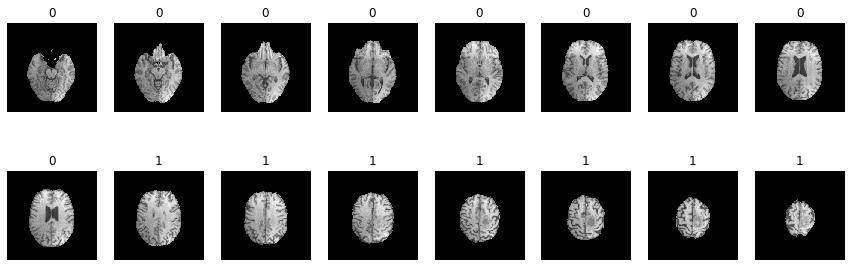

In [9]:
paths = iter(['../data/train/0/Brats17_CBICA_AQN_1_0.png','../data/train/0/Brats17_CBICA_AQN_1_1.png','../data/train/0/Brats17_CBICA_AQN_1_2.png','../data/train/0/Brats17_CBICA_AQN_1_3.png',
'../data/train/0/Brats17_CBICA_AQN_1_4.png','../data/train/0/Brats17_CBICA_AQN_1_5.png','../data/train/0/Brats17_CBICA_AQN_1_6.png','../data/train/0/Brats17_CBICA_AQN_1_7.png',
'../data/train/0/Brats17_CBICA_AQN_1_8.png','../data/train/1/Brats17_CBICA_AQN_1_9.png','../data/train/1/Brats17_CBICA_AQN_1_10.png','../data/train/1/Brats17_CBICA_AQN_1_11.png',
'../data/train/1/Brats17_CBICA_AQN_1_12.png','../data/train/1/Brats17_CBICA_AQN_1_13.png','../data/train/1/Brats17_CBICA_AQN_1_14.png','../data/train/1/Brats17_CBICA_AQN_1_15.png'])

fig, axs = plt.subplots(2, 8, figsize=(15, 5))
for y in range(0,2):
    for x in range(0,8):
        path = next(paths)
        imshow(read_img(path),get_label_from_path(path),axs[y][x])